# Snapchat Political Ads Part 1
This project uses political ads data from Snapchat, a popular social media app. The research question under consideration is:

- `What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?`

Below is an outline of the Part 1 of the investigation into this data.


### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).


### Cleaning and EDA
The cleaning and exploratory data analysis is approached to understand the data in ways relevant to the research question using univariate and bivariate analysis of the data as well as aggregations.


### Assessment of Missingness
Many columns which have `NaN` values do not actually have missing data. In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

The data dictionary will be referred to and used determine which columns do **not** belong to the scenario above, and the missingness of the these column will be assessed.

### Hypothesis Test / Permutation Test
A hypothesis test will be conducted to evaluate the significance of ads with more impressions that have spent more (Spend (USD)).


# Summary of Findings

#### Introduction

The datasets being analyzed is derived from the Snap Inc. Political and Advocacy Ads Library, also referred to as Snap. Snap "created this library to give visibility into our political and advocacy-related advertisements." They provide access to political, issue related, and adovocacy ads shown on Snapchat. This access is in the form of information on the organization that created the advertisement, impressions/views, spend, targeting criteria, and much more.

Among the information provided are columns in the dataset labeled as such:
- `AD ID` - Unique identifier for each Political Ad.

- `CreativeURL` - URL link to creative content for the Ad.

- `Currency Code` - The currency code set for the Ad Account and Ad.

- `Spend` - Amount (In local currency) spent by the advertiser over the campaign (up to the current date).

- `Impressions` - Number of times the Ad has been viewed by Snapchatters.

- `Start Date` - The time at which the Ad was set up to start delivering.

- `End Date` - The time at which the Ad was set up to stop delivering.

- `Organization Name` - The name of the Organization within Ads Manager who is responsible for creating the Ad.

- `BillingAddress` - The address of the Organization within Ads Manager who is responsible for creating the Ad.

- `CandidateBallotInformation` - The name of the candidate/ ballot initiative associated with the Ad.

- `PayingAdvertiserName` - Name of the entity providing the funds for the Ad. This is the name we will display within the Snapchat app within our "Paid for by X" disclosure.

These are just a fraction of the 30+ columns in the data set.


With the research question in mind, I explore the data to try to investigate what the `characteristics of ads with a large reach are, and what a campaign may consider when maximizing an ad's reach`.


#### Cleaning and EDA

- Since I am analyzing two separate data sets from the years 2018 and 2019, the first step was to concatenate the two CSV files to get a dataset from both years. Both datasets contain the same columns but vary in size.

- First and foremost, the variable of focus is 'Impressions', also called views. This is the number of times an ad was viewed by Snapchatters.

- The next step is to convert the `StartDate` and `EndDate` columns into datetime. This will be useful if I decide to answer a question like "When is the most common local time of day for an ad's start date," I will need to convert timezones as needed.

- The next thing to do is to create a new column of the normalized 'Spend' column using a helper function, so that all amounts are in the same currency. For simplicity I convert the currencies to USD.

- I also created a column called 'AdDuration', of the total duration for ads by taking the difference between the 'EndDate' column and the 'StartDate' column. Since I converted these columns into datetime, it makes the computation easy. I do this in case I want to answer any questions regarding the ad duration.

- Created a helper function to convert the 'Language' column from a language code to the name of the language. I then created a new column using the helper function. This will be useful if I want to answer questions about the targeting language critera used by the ad.

- Created another helper function to isolate each country from the billing address, this function was created with the idea that not all advertisers whose ads targeted the US were from the US
- used this helper function to create a new column 'BA Country' , billing address country

- I made a new column called 'AdStartMonth' which computed the month that the ad began
- I also made a new column called 'AdEndMonth' which computed the month that the ad ended





After cleaning the data I began to explore the data set, first by performing a univariate analysis on any relevant predictor variables/ columns that could potentially be useful in answering the research question. Using the .info() function the dataset I did a simple and quick assessment of the missingness to try to focus on columns that don't have much missingness. Otherwise, the data might be skewed such that univariate and bivariate analysis and graphs will not be representative of the data.

Most of the columns in the data set had over 50% null values, and some even had 100% null values. Luckily, the columns I decided as most relevant had few to no missing values, and the columns I chose not to consider had lots of missing data.

Keeping our research question and outcome variable in in mind, I decided to do out univariate analysis on 'Spend USD', 'Ad Duration','CountryCode', 'AdLanguage', and 'PayingAdvertiserName'.

Even though Ad Duration had few missing values, all of these values were because 'EndDate' contained null values. This means that these particular ads run indefinitely or until the avertiser pauses the campaign. Similarly, 'AdLanguage' contained null values, but the reason for this is because null values mean no language was targeted, or no language targeting criteria was used. 'PayingAdvertiserName' did not have null values, this seems pretty obvious considering Snap requires it so that they may evaluate if the organization or entity they are representing does not violate terms of service and policies.

When creating graphs to better understand the univariate analyses, I found that the most ads targeted the US, 2287 out of 4268. However, there were 2321 billing addresses belonging to the US. This means that 34 ads originated in the US and did not target the US. Additionally, 2259 ads both originated and targeted the US. Further analysis shows that these ads targeted Europe. I bring this up to show that it will not always be the case to assume that every ad produced in the US targeted the US, and it is not sufficient to make an assumption at first glance. Additionally, I plotted and made subsets of the data to visualize the distributions and basic statistical details of 'Spend (USD)' to see how much advertisers spent on average,etc; 'Ad Language' to see which language advertisers targeted the most; and'PayingAdvertiserName' to see if there were advertisers that seemed to occur more in the data.

Using primarily seaborn generated countplots and histograms I found that most advertisers spent less than 75,000 USD, but some advertisers spent significantly more. I even found that most of the money spent on these campaigns were likely to be under 50,000 USD. Further, I found that most did not target a specific language, followed by advertisers targeting English, and also targeting French and Norwegian speakers. Of those advertisers that did not target a language, 60 percent of that subset were advertisers that targeted the US. This makes sense seeing that Ads that target the US are not likely to target any specific language. Even though English is mainly spoken here, there is no official language, and it is better for an ad to target a broader audience. 

When conducting a univariate analysis for the 'PayingAdvertiserName' column, I found that the advertiser with the most ads had almost 35x the amount of ads that the average amount was for the data. The entity that provided the funds for the most ads was called UnRestrict Minnesota. They paid for 101 more ads than the entity with the next highest count.

The final univariate analysis plot for 'AdDuration' reveals that most ads run for less than a day, meaning hours and also that more prevalent ads run within the time frame of a week. The second largest number of ads ran for a duration of 19 days, which will be interesting in exploring its relationship in a bivariate analysis.

When doing the Bivariate analysis I first did a linear regression to examine the relationship between the number of views on an ad and the most obvious variable, 'Spend (USD)'. I found that the linear reegression plot revealed that on the lower side of the amount spend per ad, there is a stronger relationship between the two variables, but overall the data shows somewhat of a direct relationship between the two variables. The plot also reveals outliers of very expensive ads with less views than less expensive ads with more views. I can say, generally, that that the more expensive an ad the more views, but I would have to generate a model to explore this in depth. You would think that the more one spends on an ad the more views it would get, or should get, and while this is the case for the most part, the plot shows that even ad campaigns that were less by even as much as $200,000 than another ad campaign, generated more views. 

The next bivariate analysis I want to examine is the relationship between the amount spent on ad campaigns by country of advertiser.Immediately I can tell that that US advertisers not only lead all countries in total ad campaigns but also has spent the most on a single ad. 

Using supplementary tables one shows that on average, advertisers that target the UAE spend more per ad campaign than any other country, investigating further, even though UAE advertisers only made 7 ads from 2018-2019, on average, they spent the most per ad of all countries targeted. When plotting the average amount spent per ad by targeted country you are able to visually see countries such as Australia, Germany, UAE as the top 3 targeted countries whos spend the most on average per. Though they might not be the most targeted countries for ads, they certainly spend the most if targeted.

Plotting views against targeted countries I see that US targeting advertisers achieve more impressions, however, with the consideration that, by and large, advertisers who target the US also produced over 50 percent of all snapchat ads from 2019-2019. Snapchat is an American country which is logical that it would be used for ads targeting the US. However,countries such as Australia, Germany, France, and Norway still see some benefit in using this platform.

Advertisers that either did not target a specific language for their ad, or targeted english speakers achived the most views for their ad, still keep in mind advertisers that targeted the US comprised over 50 percent of all snapchat ads from 2018-2019. I also see that 60 percent of the advertisers that did not target a language were US advertisers, the UK makes up about 15 percent of the companies that did not target languages, and Norway makes up about 12 percent of the companies that did not target languages. Doing some external reserch, This is due to over 95 percent of their populations only speaking one language which makes sense as to why there really is no other language to target.

The final bivariate analyses shows the number of ads produced in each month. It seems like the summer/fall and winter months dominate as the primary ad seasons especially for ads that acheive the most views. When ads are being started I observe that approximately every two months, beginning in February, ad views seem to spike. For the end date of ads,those that end around July and December also seem to experience high ad views at the end of the campaigns. One reason for this is, at least in the US, is the midterm elections that occured in November of 2018. The sooner advertisers put out their ads, the sooner policies and candidates can begin to gain attention and traction. Other notable reasons could also be municipal elections and other local elections which would make sense for more local and targeted ads. The off year gubernatorial and special elections in 2019 would also explain these spikes, for the US at least. I cannot speak for other states but the California primary elections of 2018 that were in June are also examples of more ads that would be produced in these high-view months.  


#### Assessment of Missingness
First, I found the columns with missing values. I then ignored the columns whose missing data was missing by design, according to the descriptions in the readme file. I found that the only columns with missing data that was not missing by design were 'EndDate' and 'CandidateBallotInformation'.

I plotted other columns based on the missingness of each of these columns to determine if either of these columns might be dependent on observed data. I found that both of these columns showed patterns with the 'StartDate' column.

'EndDate' appears to be null more often when 'StartDate' is more recent. This is logical, because if an ad started delivering recently, it might not be done delivering yet. This convinced me that 'EndDate' is MAR as opposed to NMAR.

'CandidateBallotInformation' was only null for earlier 'StartDate' values. All of the non-null 'CandidateBallotInformation' values were present in the second half of 2019 and became more and more common as 'StartDate' got closer to 2020. Perhaps Snapchat changed their policy on filling this field. Or maybe this is due to the approaching presidential election in 2020. Whatever the reason, the pattern was strong enough to convince me that 'CandidateBallotInformation' is MAR as opposed to NMAR.

(I also included categorical TVD permutation tests comparing 'StartDate' to the missingness of both columns and received a strong p-value of 0 both times.)

Next, I found a column that 'EndDate' was dependent on, and one that it was not dependent on.

To test dependence I used permutation tests with the following format:
Null Hypothesis: The missingness of EndDate is NOT dependent on the column.
Alternative Hypothesis: The missingness of EndDate IS at least partially dependent on the column.
Level of significance: p-val < .05

I tested 'EndDate' dependence on 'Spend (USD)' using 3 different test statistics; Absolute Difference in Means, Total Variation Distance, and Kolmogorov-Smirnov. All 3 returned p-values under .01, well under the set level of significance. This suggests 'EndDate' is at least partially dependent on the observed data in 'Spend (USD)'.

I then tested 'EndDate' dependence on 'ADID' using a categorical TVD permutation test. This test returned a p-value of 1. This is not surprising, since 'ADID' is unique and never repeats, the TVD should always be 1. Furthermore, since each 'ADID' is unique, 'EndDate' as well as any other column should not be dependent on 'ADID' at all. This was confirmed by the permutation test.

If I plan to use either 'EndDate' or 'CandidateBallotInformation' to make conclusions I must first properly impute data for the missing values. If I don't, I might accidentally be misrepresenting certain types of ads, since both columns are dependent on observed data from other columns.

### Hypothesis Test
I decided to focus on the characteristics of ads with a large reach (high amount of impressions). To find out more about ads with many impressions, I wanted to test if campaigns with ads with more impressions have spent more (Spend (USD)).

- Question: Do ads in the top 25% of impressions have higher spending campaigns (Spend (USD))?
- Test: Permutation test using difference in means as the test statistic.
- Null Hypothesis: Campaigns with ads in the top 25% of impressions spend about the same as all campaigns on average.
- Alternate Hypothesis: Campaigns with ads in the top 25% of impressions spend more than all campaigns on average.

Level of significance: p-value < .01

- Result: p-value = 0
- Observed test-statistic: 5763.92 USD
- Average of 1,000 trials: -4.45 USD (close to 0 as expected)

These results clearly show that the null hypothesis should be rejected.

I chose this test statistic because the values being compared are numerical. Additionally, there are multiple other factors that affect campaign spending, so taking the mean of many campaigns helps to account for this variation.

The null hypothesis is the "boring" option. It represents the scenario where there is no significant statistical difference, meaning the distributions are the same/similar. The alternate hypothesis is the opposite of this. It represents the scenario where there is a significant difference, meaning the distributions are also different.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
from util import multi_table
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp

### Cleaning and EDA

In [2]:
# read in both data sets from 2018 and 2019
pa18 = pd.read_csv("PoliticalAds2018.csv")
pa19 = pd.read_csv("PoliticalAds2019.csv")

# view all cut off columns
pd.set_option('display.max_columns', None)

# concat both data frames
df = pd.concat([pa18,pa19]).reset_index(drop =True)

# # convert start and end date columns to universal datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], utc = True)
df['EndDate'] = pd.to_datetime(df['EndDate'], utc = True)
df

# normalize 'Spend' column to have same currency, in USD
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*1.08 if row['Currency Code'] =='EUR' else row['Spend']*1, axis=1)
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*0.71 if row['Currency Code'] =='CAD' else row['Spend']*1, axis=1)
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*1.22 if row['Currency Code'] =='GBP' else row['Spend']*1, axis=1)
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*0.64 if row['Currency Code'] =='AUD' else row['Spend']*1, axis=1)

# create a column of the total duration for ad 
df['Ad Duration'] = df['EndDate'] - df['StartDate']


#helper function to convert language code to a language
def lang_conv(language):
    if language == 'da':
        return 'Danish'
    if language == 'en':
        return 'English'
    if language == 'nl':
        return 'Dutch'
    if language == 'de':
        return 'German'
    if language == 'es':
        return 'Spanish'
    if language == 'es,en':
        return 'English and Spanish'
    if language == 'fr':
        return 'French'
    if language == 'sv':
        return 'Swedish'
    if language == 'en,de':
        return 'English and German'
    if language == 'en,es':
        return 'English and Spanish'
    if language == 'ar':
        return 'Arabic'
    if language == 'nb':
        return 'Norwegian'
    if language == 'nl,en':
        return 'Dutch and English'
    if language == 'ar,en':
        return 'English and Arabic'
    if language == 'de,en':
        return 'English and German'
    if language == 'fi':
        return 'Finnish'
    if language == 'it':
        return 'Italian'
    if language == 'nb,en':
        return 'English and Norwegian'
    else:
        return 'No Language Targeted'
    
#helper func to get country of billing address
def country_conv(string):
    if string[-2:] == 'US':
        return 'US'
    if string[-2:] == 'CA':
        if len(string) == 2:
            return 'CANADA'
        elif (len(string.split(",")[-2])  == 6) | (len(string.split(",")[-2])  == 7):
            return 'CANADA'
        else:
            return 'US'
    if string[-2:] == 'DK':
        return 'DENMARK'
    if string[-2:] == 'GB':
        return 'UK'
    if string[-2:] == 'CH':
        return 'SWITZERLAND'
    if string[-2:] == 'AU':
        return 'AUSTRALIA'
    if string[-2:] == 'FR':
        return 'FRANCE'
    if string[-2:] == 'NL':
        return 'NETHERLANDS'
    if string[-2:] == 'IE':
        return 'IRELAND'
    if string[-2:] == 'SE':
        return 'SWEDEN'
    if string[-2:] == 'NO':
        return 'NORWAY'
    if string[-2:] == 'BE':
        return 'BELGIUM'
    if string[-2:] == 'AE':
        return 'UAE'
    if string[-2:] == 'ZA':
        return 'SOUTH AFRICA'
    if string[-2:] == 'FI':
        return 'FINLAND'
    if string[-2:] == 'IN':
        return 'INDIA'
    if string[-2:] == 'AR':
        return 'ARGENTINA'
    if string[-2:] == 'AT':
        return 'AUSTRIA'
    if string[-2:] == 'KW':
        return 'KUWAIT'
    if string[-2:] == 'LT':
        return 'LITHUANIA'
    if string[-2:] == 'TR':
        return 'TURKEY'
    if string[-2:] == 'DE':
        return 'GERMANY'
    
df['BA Country'] = df['BillingAddress'].apply(country_conv)
    
#apply helper func, (will be useful for graphing purposes)
#null values mean no specific language was targeted
df['AdLanguage'] = df['Language'].apply(lang_conv)

df.head()


ADID  \
0  2b1f1addb0fca4edff54fa0c1749fa720774ce6ac77b33...   
1  23194e244e9d039a181683a1ef8adac4cd6a55ead77db6...   
2  151fe09cfa3ca90f2ee4dd3ba8641235413c033fb3c953...   
3  686856beae0c6a67691bbc703379767956da221c576d3a...   
4  4aba2daaa932b40b20e9c124cf7b424a90d612c31fcc7c...   

                                         CreativeUrl Currency Code  Spend  \
0  https://www.snap.com/political-ads/asset/00658...           USD    897   
1  https://www.snap.com/political-ads/asset/4f5b7...           USD     49   
2  https://www.snap.com/political-ads/asset/5accf...           EUR    219   
3  https://www.snap.com/political-ads/asset/9f3e2...           USD     66   
4  https://www.snap.com/political-ads/asset/48ef2...           USD    815   

   Impressions                 StartDate                   EndDate  \
0       252799 2018-11-04 00:57:48+00:00 2018-11-07 03:00:05+00:00   
1         7527 2018-10-31 17:58:01+00:00 2018-11-06 22:59:59+00:00   
2       108884 2018-09-30 10:24:48+00:00 2018-10-14 10:24:55+00:00   
3        22167 2018-11-02 13:00:00+00:00 2018-11-03 03:59:59+00:00   
4        72711 2018-10-18 16:25:09+00:00 2018-11-06 23:00:00+00:00   

                               OrganizationName  \
0                  Save Our Schools Arizona PAC   
1                         Mothership Strategies   
2                                   Media Agent   
3  Chuck Clemons for Florida House District 21    
4                      Bully Pulpit Interactive   

                                      BillingAddress  \
0                                                 US   
1  1328 Florida Avenue NW, Building C, Washington...   
2                     Østre alle 2 ,Værløse ,3500,DK   
3                                                 US   
4           1445 New York Ave NW,Washington,20005,US   

  CandidateBallotInformation          PayingAdvertiserName Gender AgeBracket  \
0                        NaN  Save Our Schools Arizona PAC    NaN        18+   
1                        NaN   Progressive Turnout Project    NaN        18+   
2                        NaN              Dansk_Folkeparti    NaN        NaN   
3                        NaN    Chuck Clemons for FL House    NaN        17+   
4                        NaN               NextGen America    NaN      18-34   

     CountryCode Regions (Included) Regions (Excluded)  \
0  united states            Arizona                NaN   
1  united states                NaN                NaN   
2        denmark                NaN                NaN   
3  united states                NaN                NaN   
4  united states                NaN                NaN   

  Electoral Districts (Included)  Electoral Districts (Excluded)  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

                         Radius Targeting (Included)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  latitude 29.65199994518531;longitude -82.33818...   
4                                                NaN   

  Radius Targeting (Excluded) Metros (Included) Metros (Excluded)  \
0                         NaN               NaN               NaN   
1                         NaN               NaN               NaN   
2                         NaN               NaN               NaN   
3                         NaN               NaN               NaN   
4                         NaN               NaN               NaN   

                             Postal Codes (Included) Postal Codes (Excluded)  \
0                                                NaN                     NaN   
1                               

#### Univariate EDA

Statistical details of the amount of ads viewed by snapchatters


In [3]:
df['Impressions'].describe()
#most views on a single ad
df['Impressions'].max()
#least views on a single ad
df['Impressions'].min()
#average views on a single ad
df['Impressions'].min()

#statistical details of the amount spent by the advertiser on a campaign ad
df['Spend (USD)'].describe()
#max spent on an ad
df['Spend (USD)'].max()
#least spent on an ad (ads)
# according to Snapchat, ads that are $0 are the amount 'spent in local currency and rounded to the nearest increment'
df['Spend (USD)'].min()
#average spent on ad
df['Spend (USD)'].mean()


1655.2727553889406

Seaborn countplot of the number of ads that targeted each country


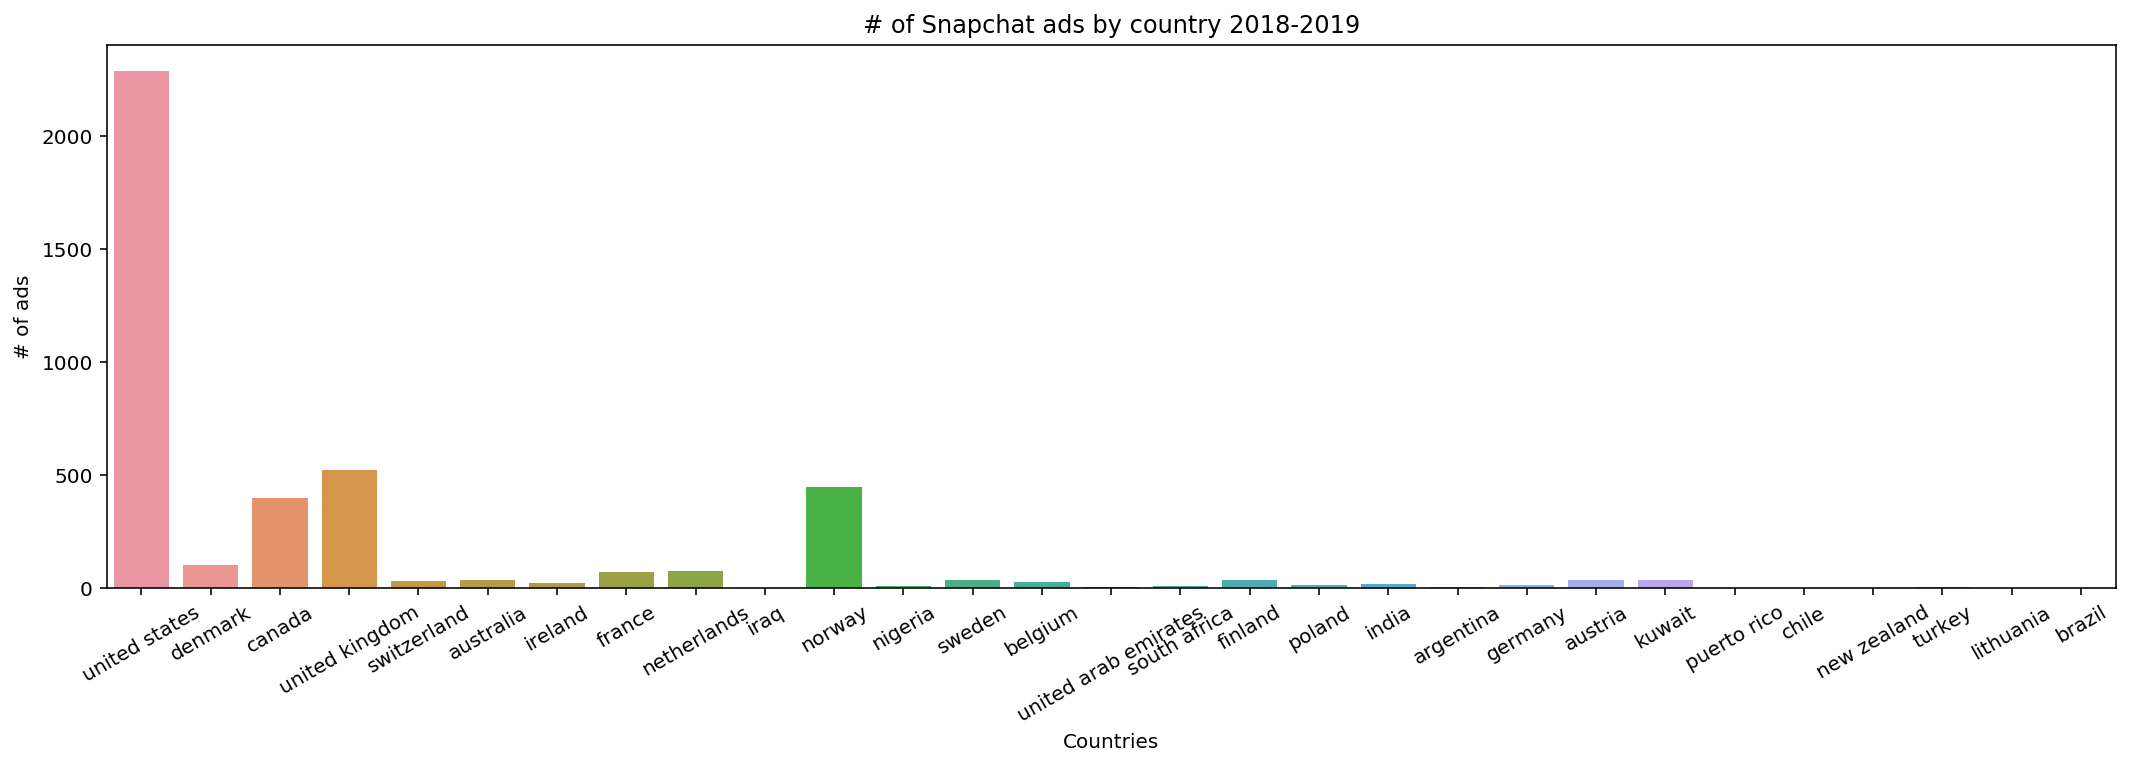

In [4]:
plt.figure(figsize=(18,5))
sns.countplot(x='CountryCode', data=df)
plt.title('# of Snapchat ads by country 2018-2019')
plt.ylabel('# of ads')
plt.xlabel('Countries')
plt.xticks(rotation = 30)
plt.show();
# observe that the organizations who were responsbile for creating the ads were mostly from the US
# the top 5 countries that produced the most ads were the US, UK, Norway, Canada, and Denmark, respectively





The proportion of each country that advertisers targeted

In [5]:
#this gives the proportion of each country that the advertiser targeted
#over 50% of the ads targeted the US
df.groupby(['CountryCode']).apply(len) / len(df['CountryCode'])

CountryCode
argentina               0.001406
australia               0.008435
austria                 0.008669
belgium                 0.006560
brazil                  0.000234
canada                  0.093486
chile                   0.000234
denmark                 0.024602
finland                 0.008201
france                  0.016870
germany                 0.003046
india                   0.004217
iraq                    0.000234
ireland                 0.006092
kuwait                  0.008201
lithuania               0.000703
netherlands             0.018510
new zealand             0.000234
nigeria                 0.002109
norway                  0.105201
poland                  0.003280
puerto rico             0.000469
south africa            0.002343
sweden                  0.008669
switzerland             0.007263
turkey                  0.000937
united arab emirates    0.001640
united kingdom          0.122306
united states           0.535848
dtype: float64

In [6]:
#additional analysis
#ads that targeted the us and were whose advertisers had billing addreses in the US
print(df[(df['BA Country'] == 'US') & (df['CountryCode'] == 'united states')].shape[0])
#ads whose billing address was from the US
print(df[df['BA Country'] == 'US'].shape[0])
#ads that targeted the US
print(df[df['CountryCode'] == 'united states'].shape[0])
#ads that targeted Europe with billing addresses in the US
temp = df[df['BA Country'] == 'US']
print(temp[temp['Currency Code'] == 'EUR'].shape[0])

2259
2321
2287
59


In [7]:
#gives basic statistical details for the how much was spent over an ad campaign
df['Spend (USD)'].describe()

count      4268.000000
mean       1655.272755
std       12125.476826
min           0.000000
25%          40.000000
50%         195.000000
75%         766.500000
max      451244.000000
Name: Spend (USD), dtype: float64

#### Univariate EDA

Shown below is the univariate distribution of the amount spent by advertisers on ad campaigns from 2018-2019
A rug plot is plotted on top which represents each observation, shown by the ticks.

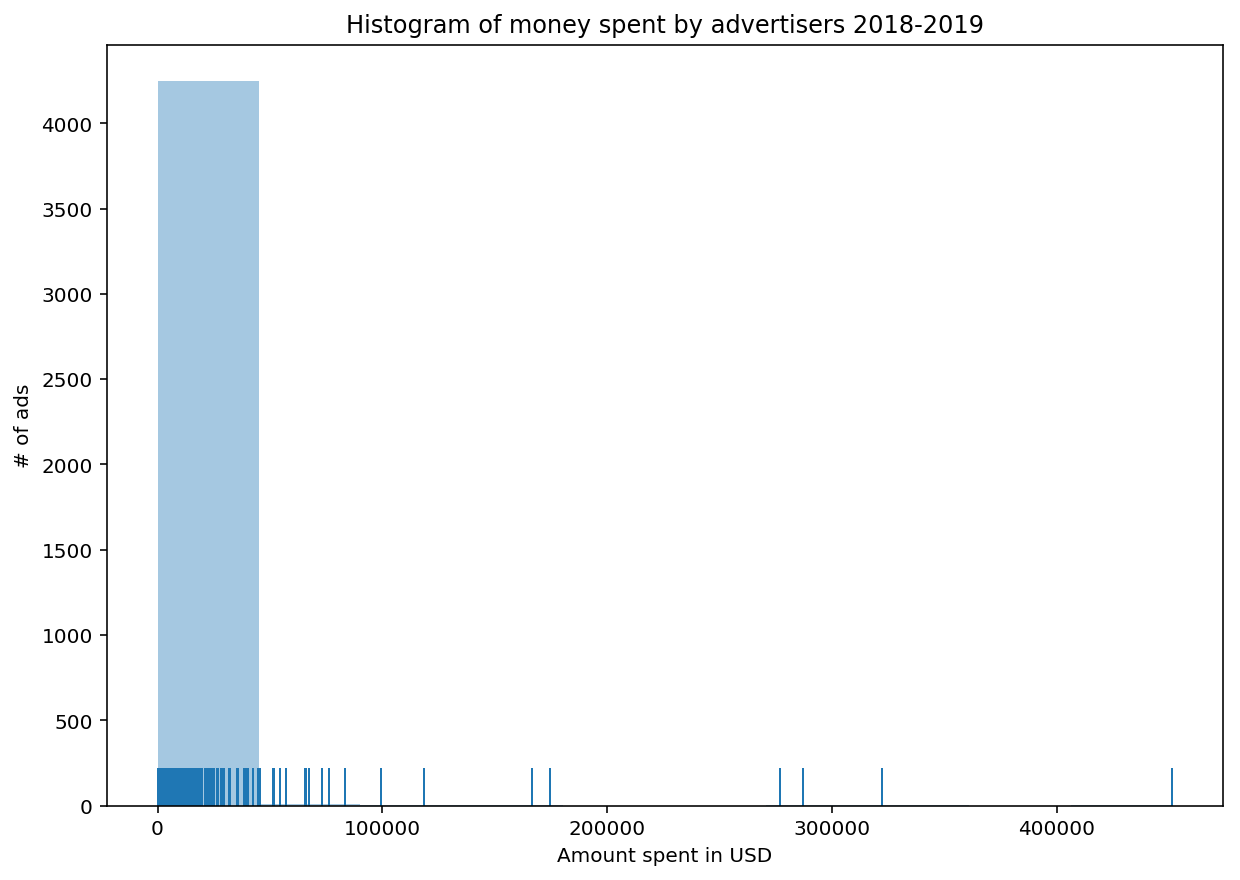

In [8]:

plt.figure(figsize=(10,7))
sns.distplot(df['Spend (USD)'], bins=10, kde=False, rug=True);
plt.title('Histogram of money spent by advertisers 2018-2019')
plt.ylabel('# of ads')
plt.xlabel('Amount spent in USD')
plt.show();
#observe that the majority of ads are were less than $100,000

Below is the univariate distribution of the 'Spend (USD)' column. This is similar to the histogram however a kernel density estimate is also fit. Thus a better get a picture of the probability density of the observations as well. KDE plots the density of the observations vs height. The plot depicts the probability density of the amount spent on ad campaigns from 2018-2019.


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


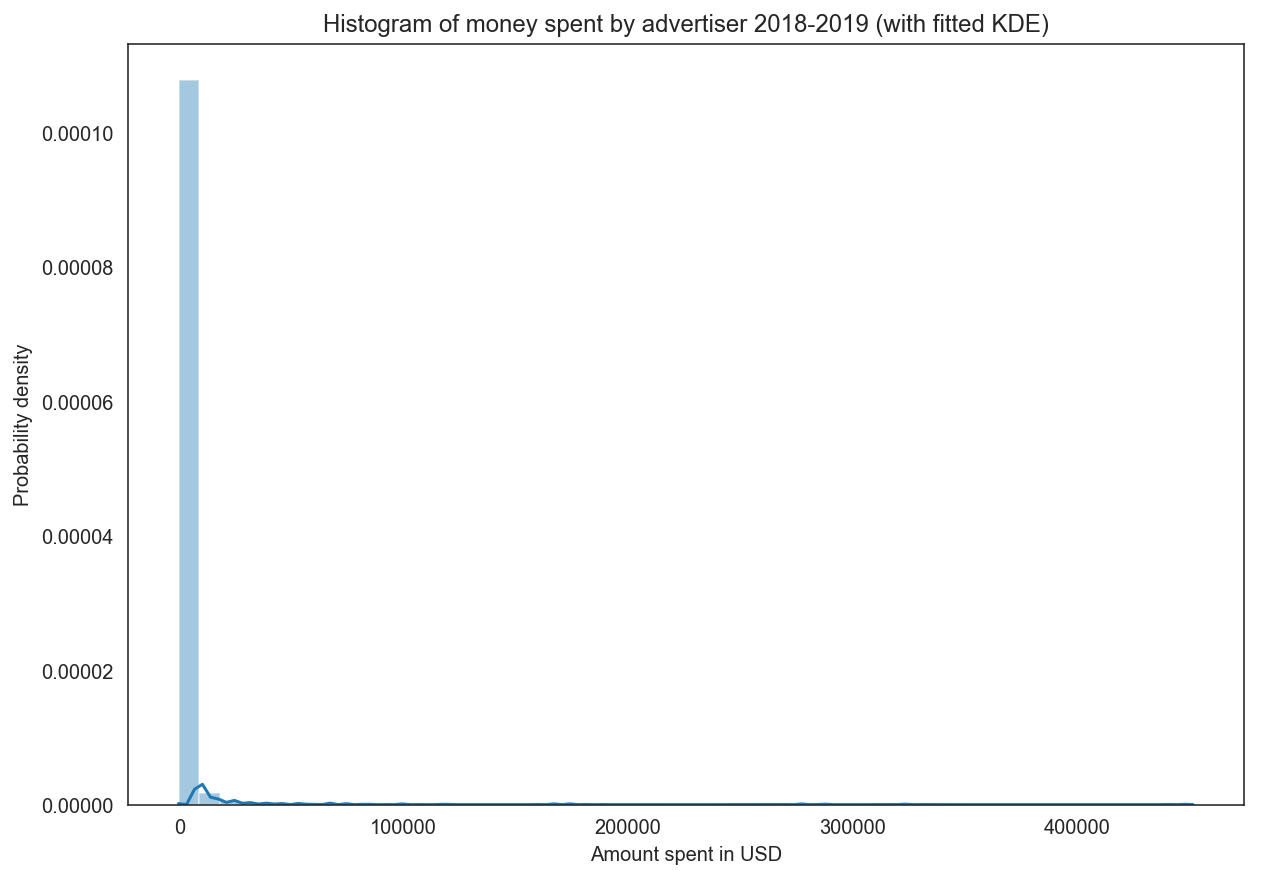

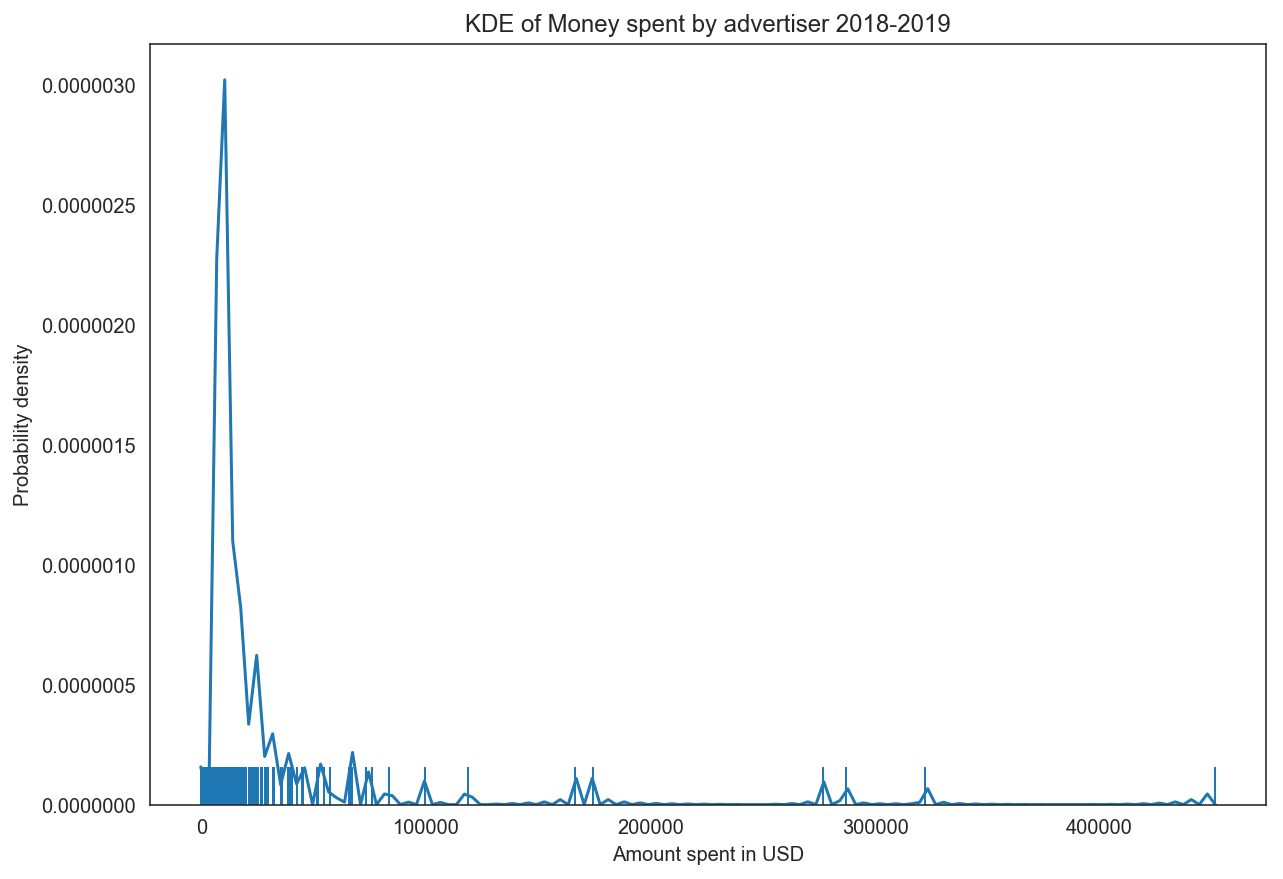

In [9]:

plt.figure(figsize=(10,7))
sns.set_style("white")
sns.distplot(df['Spend (USD)'])
plt.title('Histogram of money spent by advertiser 2018-2019 (with fitted KDE)')
plt.ylabel('Probability density')
plt.xlabel('Amount spent in USD')
plt.show();


plt.figure(figsize=(10,7))
sns.distplot(df['Spend (USD)'], hist = False, rug = True)
plt.title('KDE of Money spent by advertiser 2018-2019')
plt.ylabel('Probability density')
plt.xlabel('Amount spent in USD')
plt.show();



Below is a countplot to observe which languages are targeted the most.

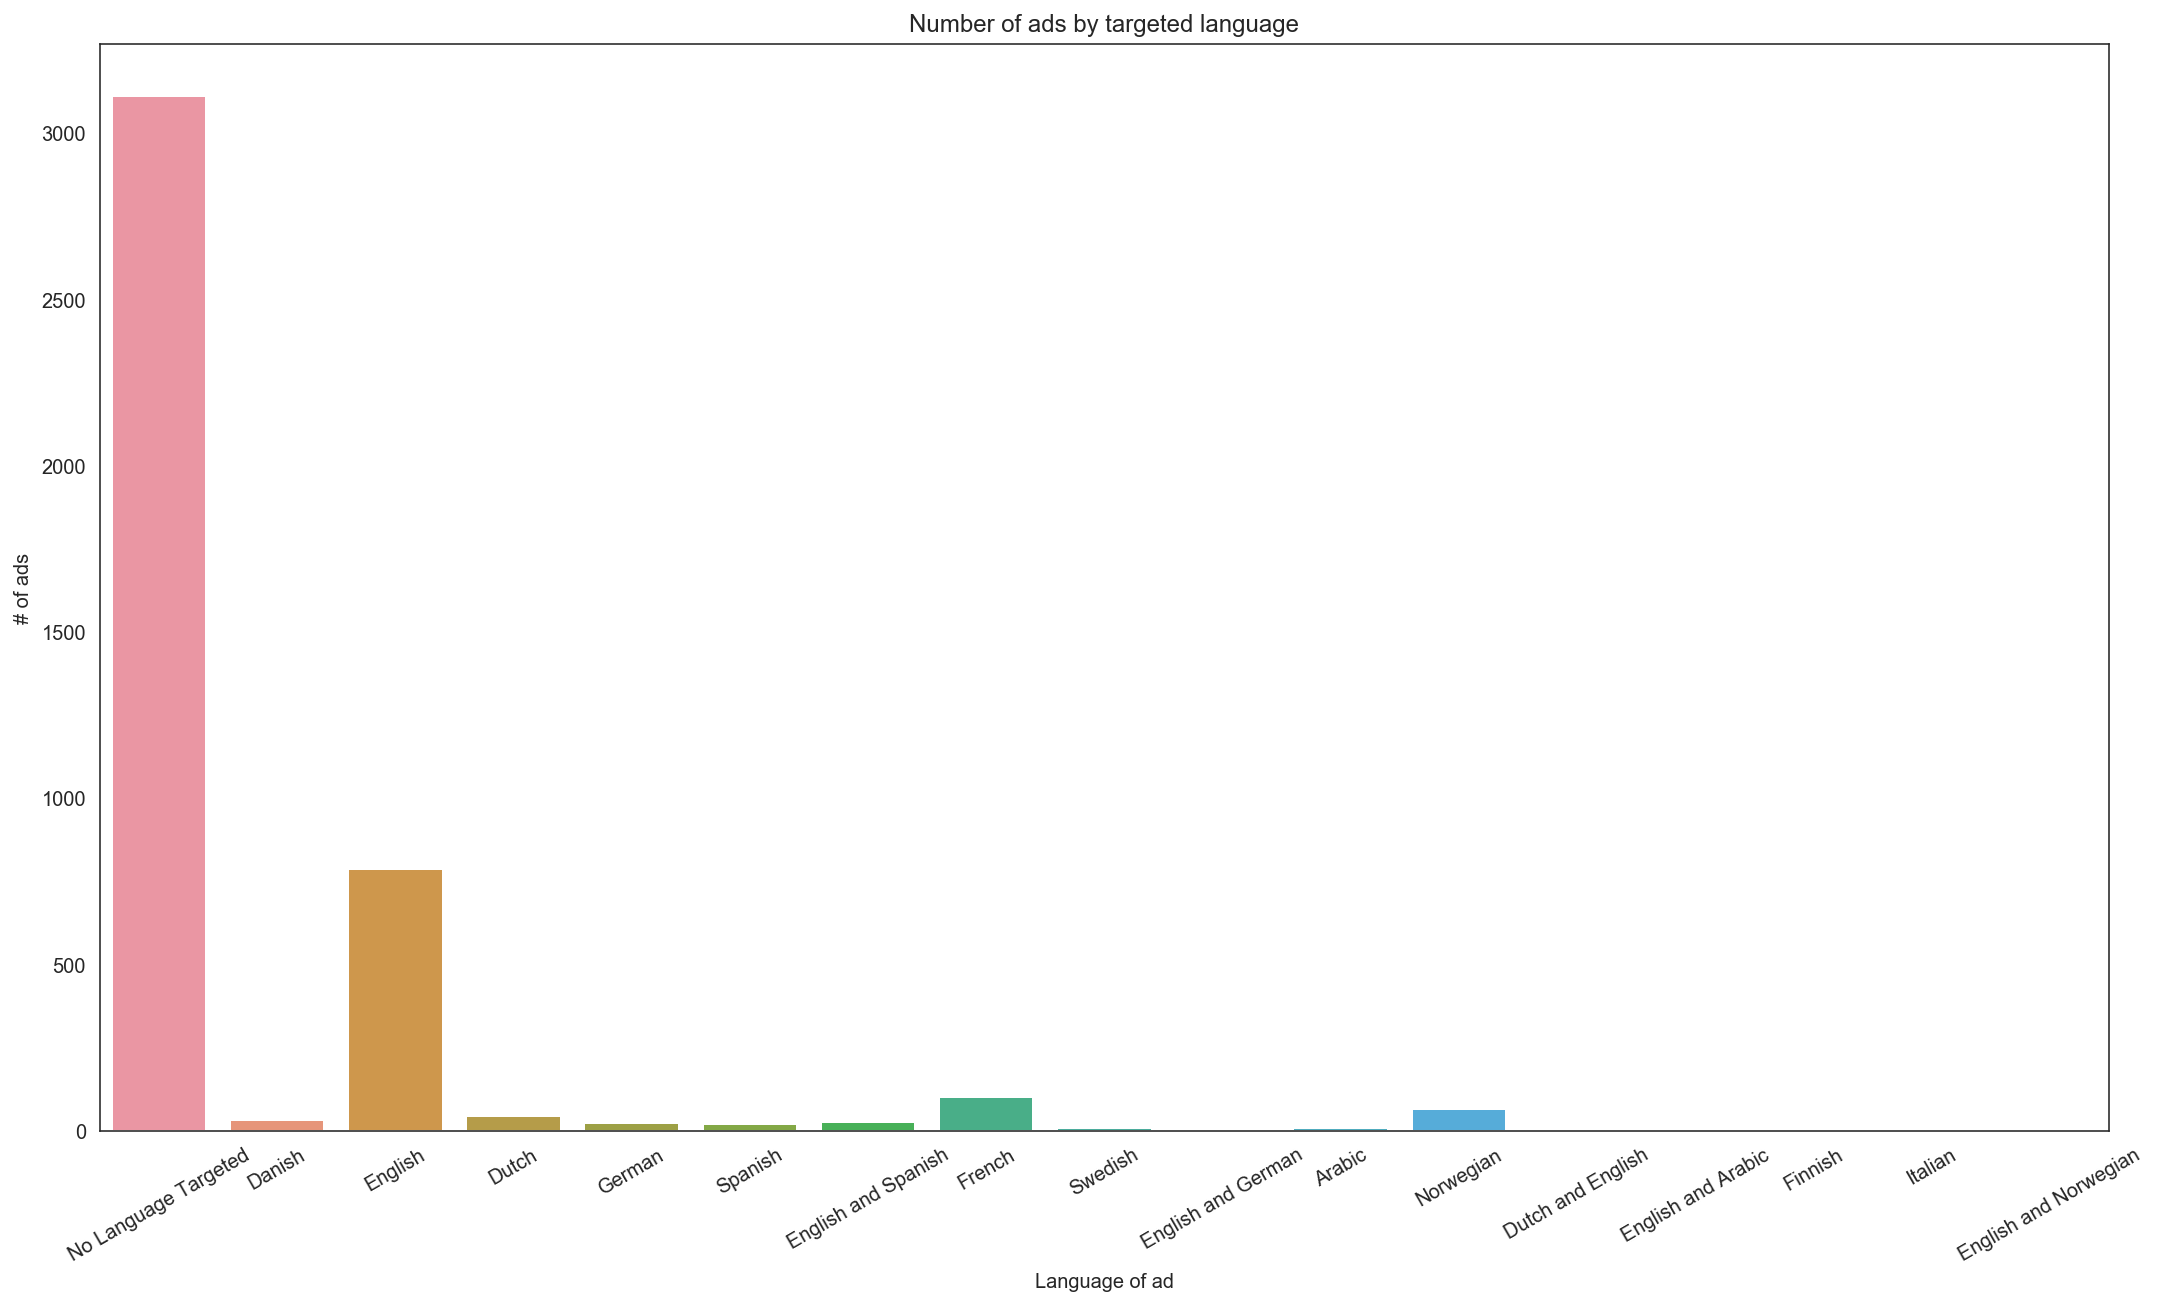

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(x='AdLanguage', data=df)
plt.title('Number of ads by targeted language')
plt.ylabel('# of ads')
plt.xlabel('Language of ad')
plt.xticks(rotation = 30)
plt.show();


Of the advertisers that did not target a language, 60% of that subset were advertisers that targeted the US
Below are all the proportions of the countries that belong to the 'No Language Targeted' column of the plot above.



In [11]:
#the 'No Language Targeted' column in the countplot is disproportionately larger than the other columns
#next I analyze this column
#creates subset of dataframe with of all the advertisers that did not target a language
nlt = df[df['Language'].isnull()]
#gets proportion of countries that did not use language targeting criteria
nlt.groupby('CountryCode').apply(len) / nlt.shape[0]


CountryCode
argentina               0.001927
australia               0.008031
austria                 0.007710
belgium                 0.003212
canada                  0.000321
chile                   0.000321
denmark                 0.023129
finland                 0.009958
france                  0.012528
germany                 0.002891
india                   0.005782
iraq                    0.000321
ireland                 0.008031
kuwait                  0.007710
lithuania               0.000964
netherlands             0.010922
nigeria                 0.002570
norway                  0.121105
poland                  0.004497
puerto rico             0.000321
south africa            0.003212
sweden                  0.008995
switzerland             0.003855
turkey                  0.001285
united arab emirates    0.001285
united kingdom          0.151301
united states           0.597816
dtype: float64

Countplot of the number of ads by paying advertiser

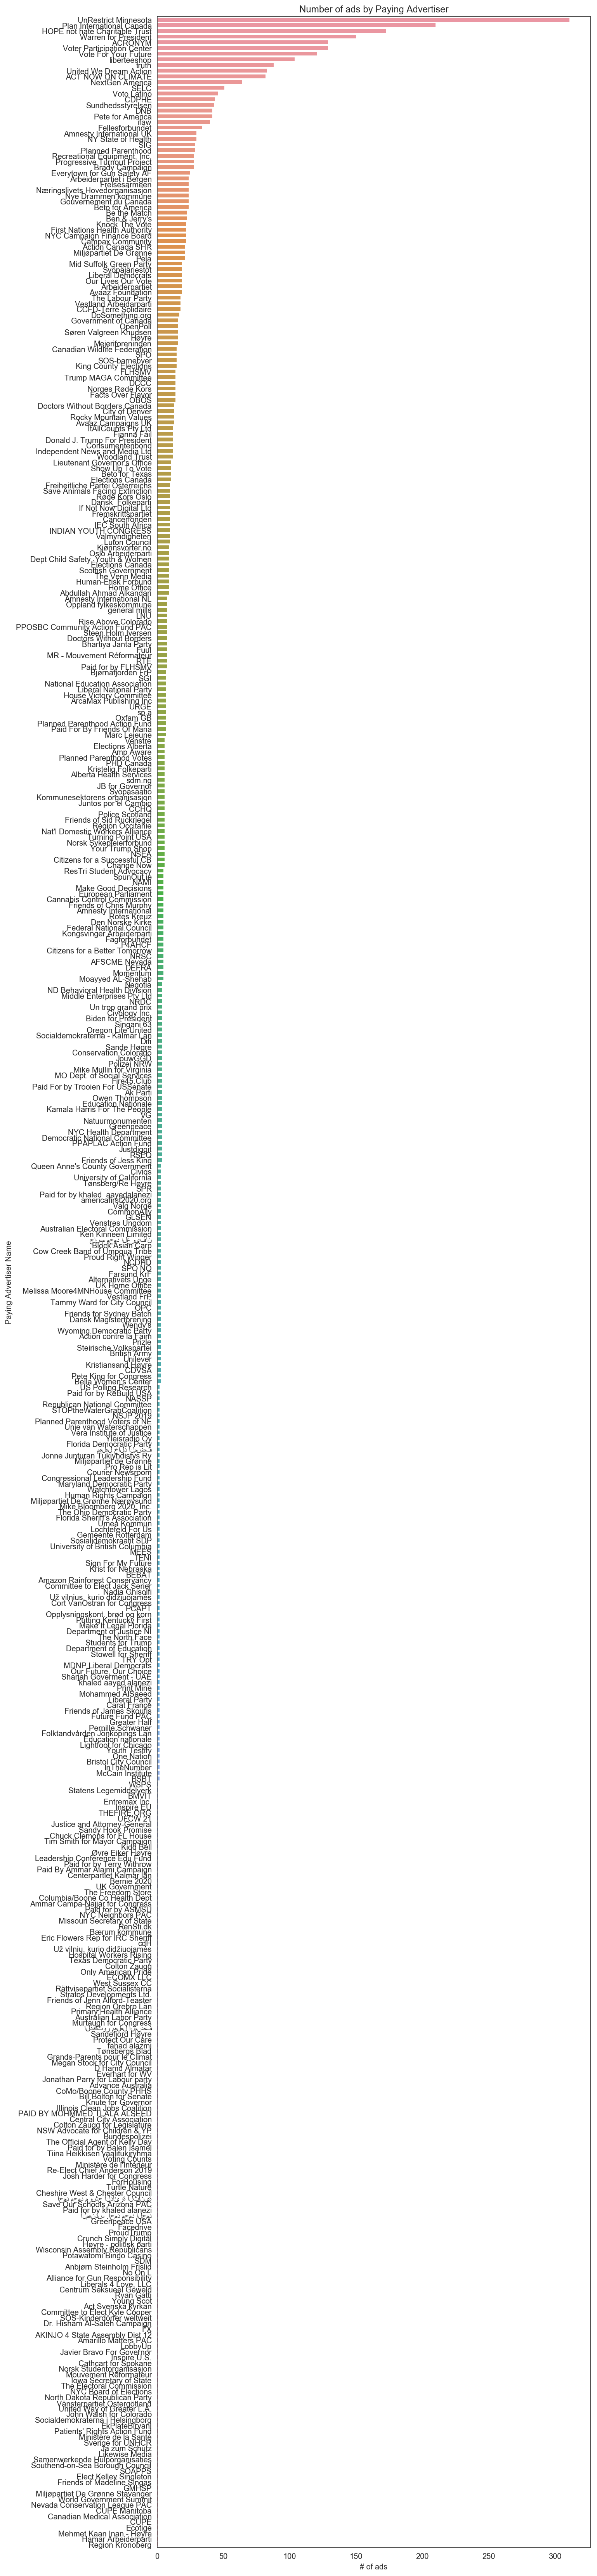

In [12]:
#it is the name of the entity display within the Snapchat app within our "Paid for by X" disclosure.
# this plot shows which advertisers create the most ads
plt.figure(figsize=(10,60))
sns.countplot(y='PayingAdvertiserName', data=df, order = df['PayingAdvertiserName'].value_counts().index)
plt.title('Number of ads by Paying Advertiser')
plt.ylabel('Paying Advertiser Name')
plt.xlabel('# of ads')
plt.show();

Below are the advertisers that produced the most Snapchat ads from 2018- 2019

In [13]:
df.groupby('PayingAdvertiserName').apply(len).sort_values(ascending=False).head(10)

PayingAdvertiserName
UnRestrict Minnesota              311
Plan International Canada         210
HOPE not hate Charitable Trust    173
Warren for President              150
ACRONYM                           129
Voter Participation Center        129
Vote For Your Future              121
liberteeshop                      104
truth                              88
United We Dream Action             83
dtype: int64

This plot below reveals that most ads run for less than a day, meaning hours, and also that more prevalent ads run within the time frame of a week. Interestingly, The second most popular ad duration were ads that ran for a duration of 19 days.

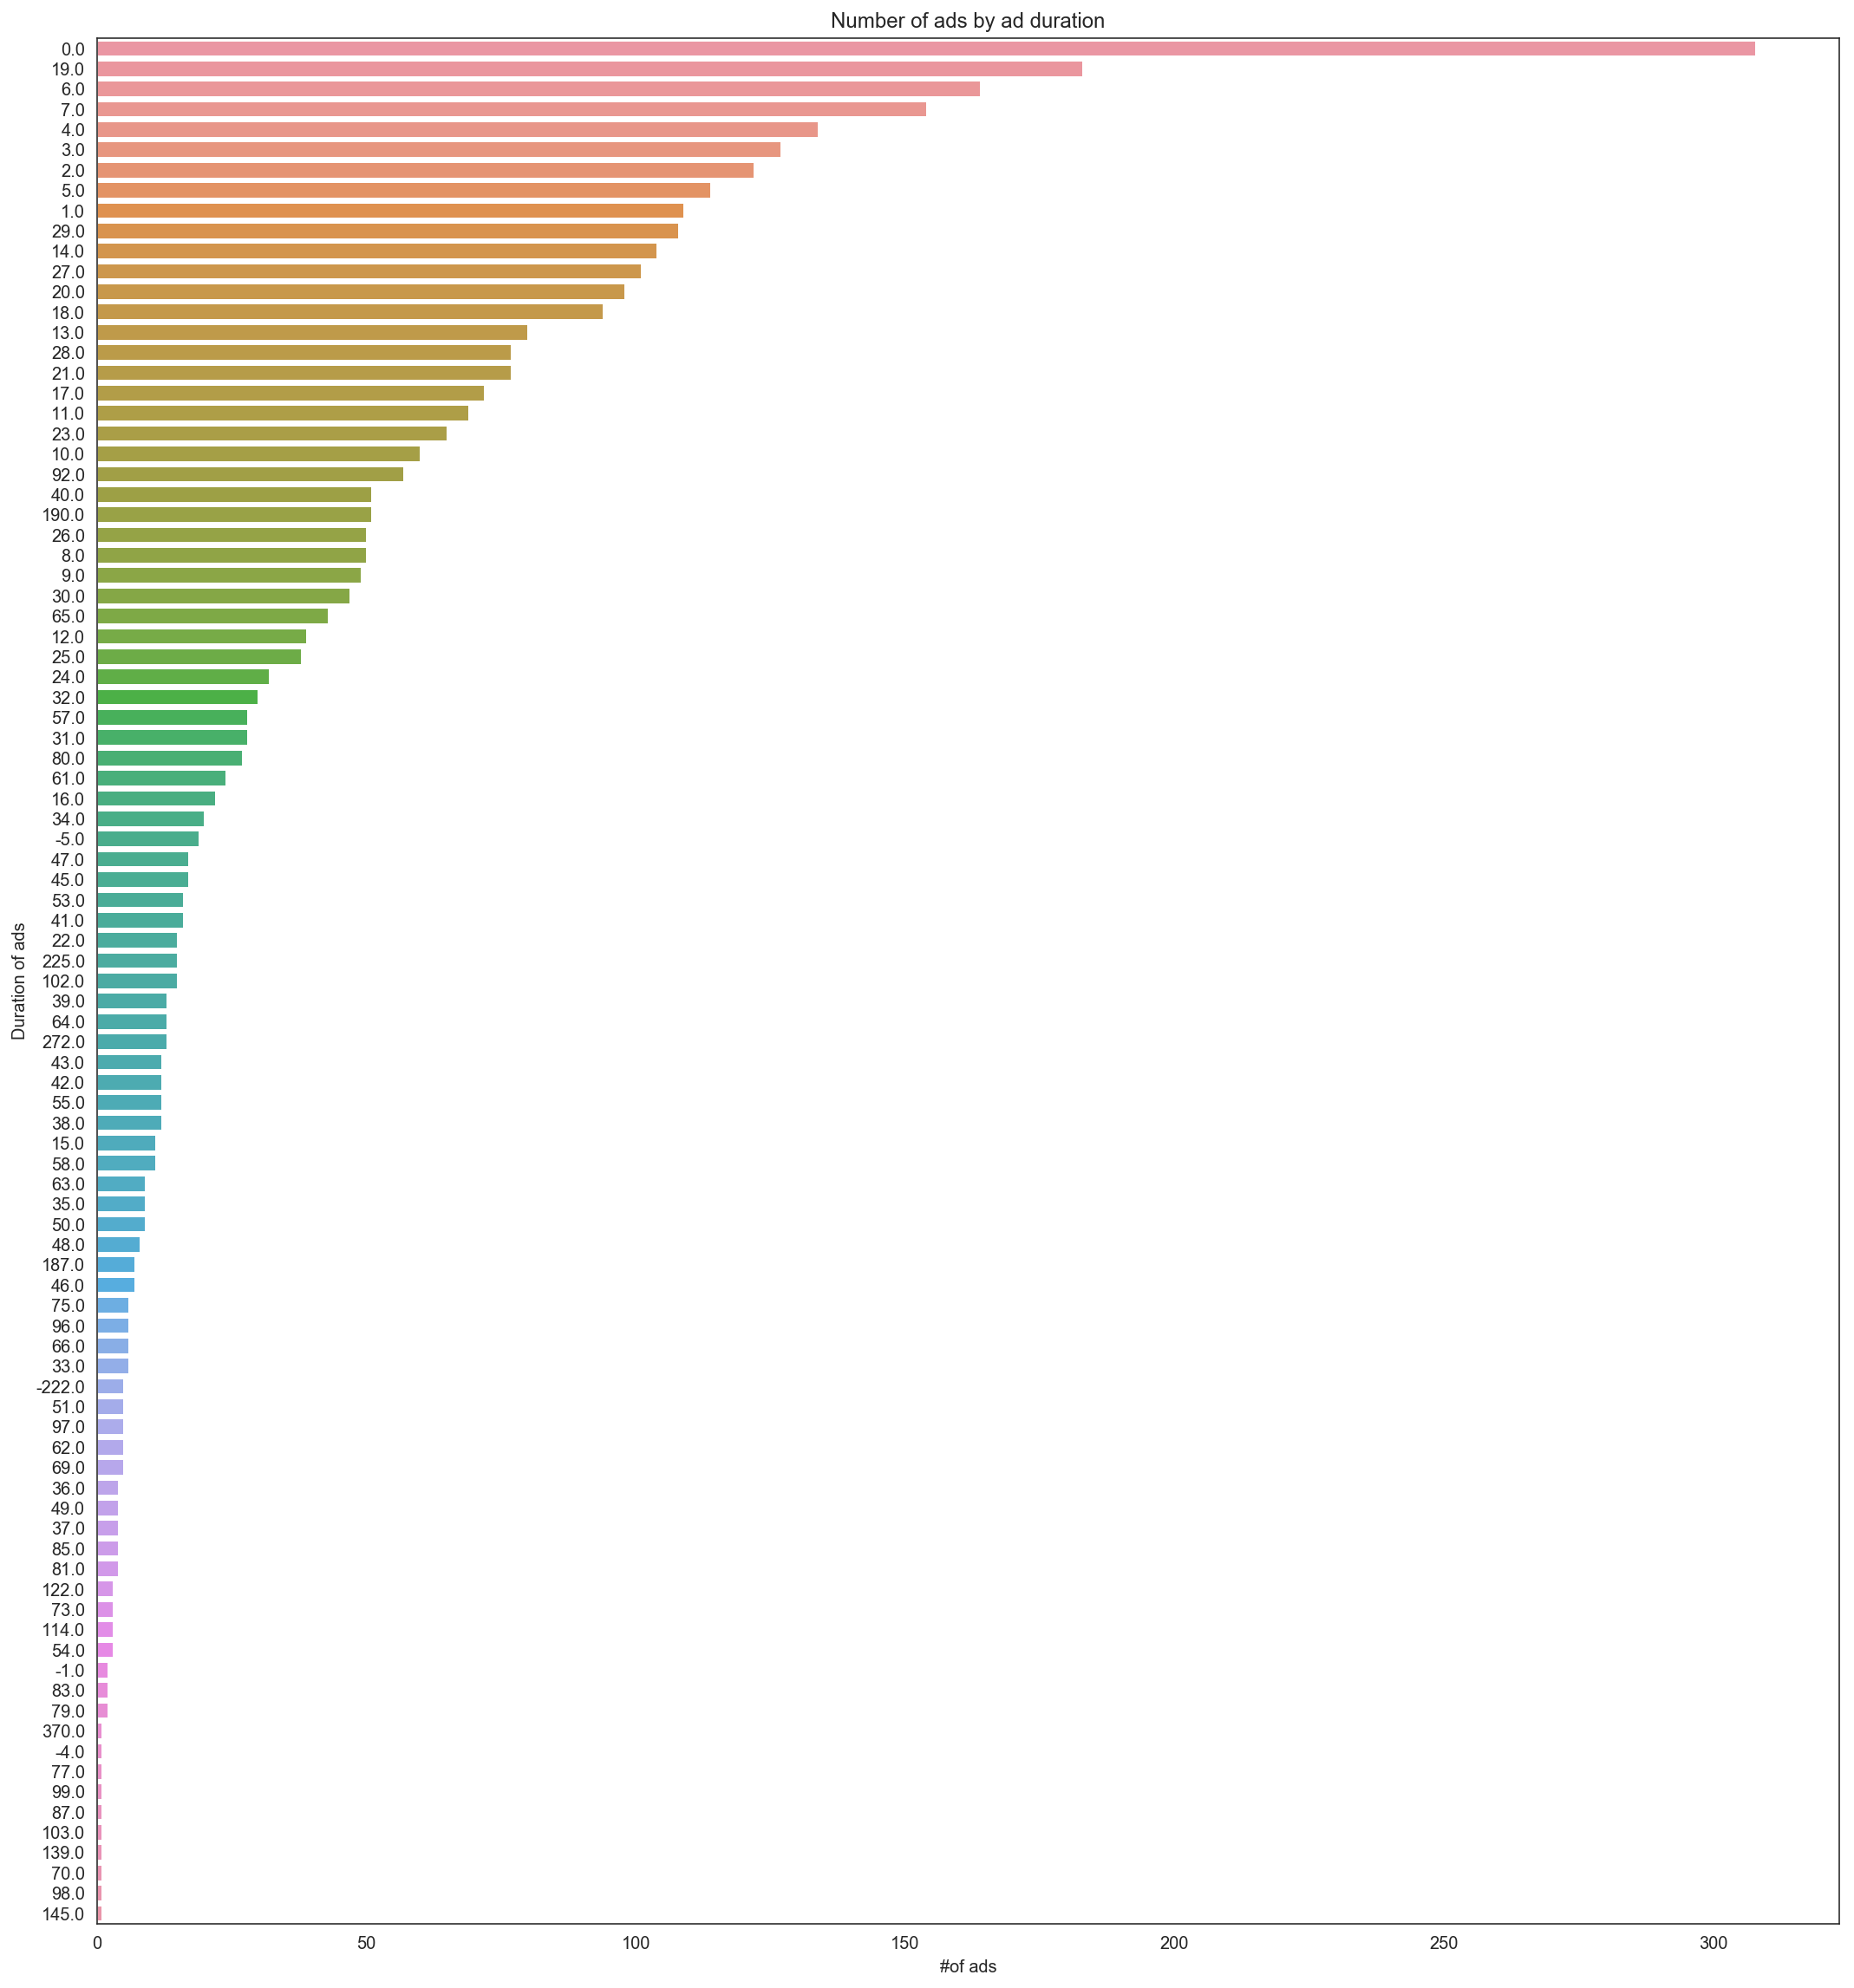

In [14]:
#convert time delta object to days
df['Ad Duration'] = df['Ad Duration'].dt.days
# count plot of ad duration (in days)
plt.figure(figsize=(18,20))
sns.countplot(y='Ad Duration', data=df,order = df['Ad Duration'].value_counts().index)

plt.title('Number of ads by ad duration')
plt.ylabel('Duration of ads')
plt.xlabel('#of ads')

plt.show();

#this plot reveals that most ads run for less than a day, meaning hours
# and that also that more prevalent ads run within the time frame of a week
#the second largest number of ads ran for a duration of 19days, this is interesting

Looking at the data I notice the plot has some negative values The reason for these negative values is that the end date of the ad was before the start date. This could've been an error in the way the data was recorded or collected, or another reason. Inquiry in to this issue did not lead to any explanation from Snapchat.

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


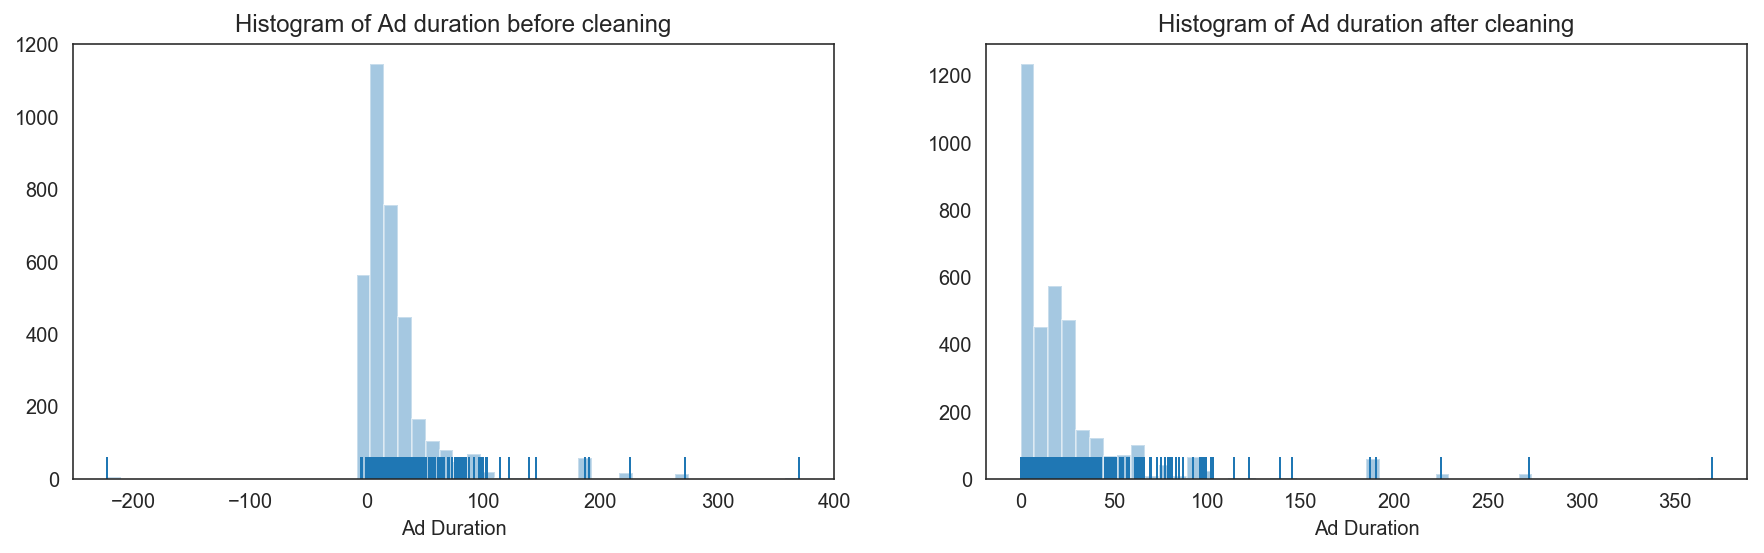

<Figure size 720x504 with 0 Axes>

In [15]:


#plot these observations to see how it changes the distribtions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))

plt.figure(figsize=(10,7))
sns.distplot(df['Ad Duration'], bins=50, kde=False, rug=True, ax = ax1);
ax1.set_title('Histogram of Ad duration before cleaning')
posad = df[df['Ad Duration'] >=0]
sns.distplot(posad['Ad Duration'], bins=50, kde=False, rug=True, ax = ax2);
ax2.set_title('Histogram of Ad duration after cleaning')
plt.show();

#observe that plotting ad duration including the negative values skews the data

#### Bivariate EDA

Since our research question involves analyzing the characteristics of ads with a large reach out first bivariate analysis will involve plotting the relationship between the amount spent by an advertiser on ad views.

Text(0.5, 1.0, 'Linear regession of the effect of amount spend on ad views')

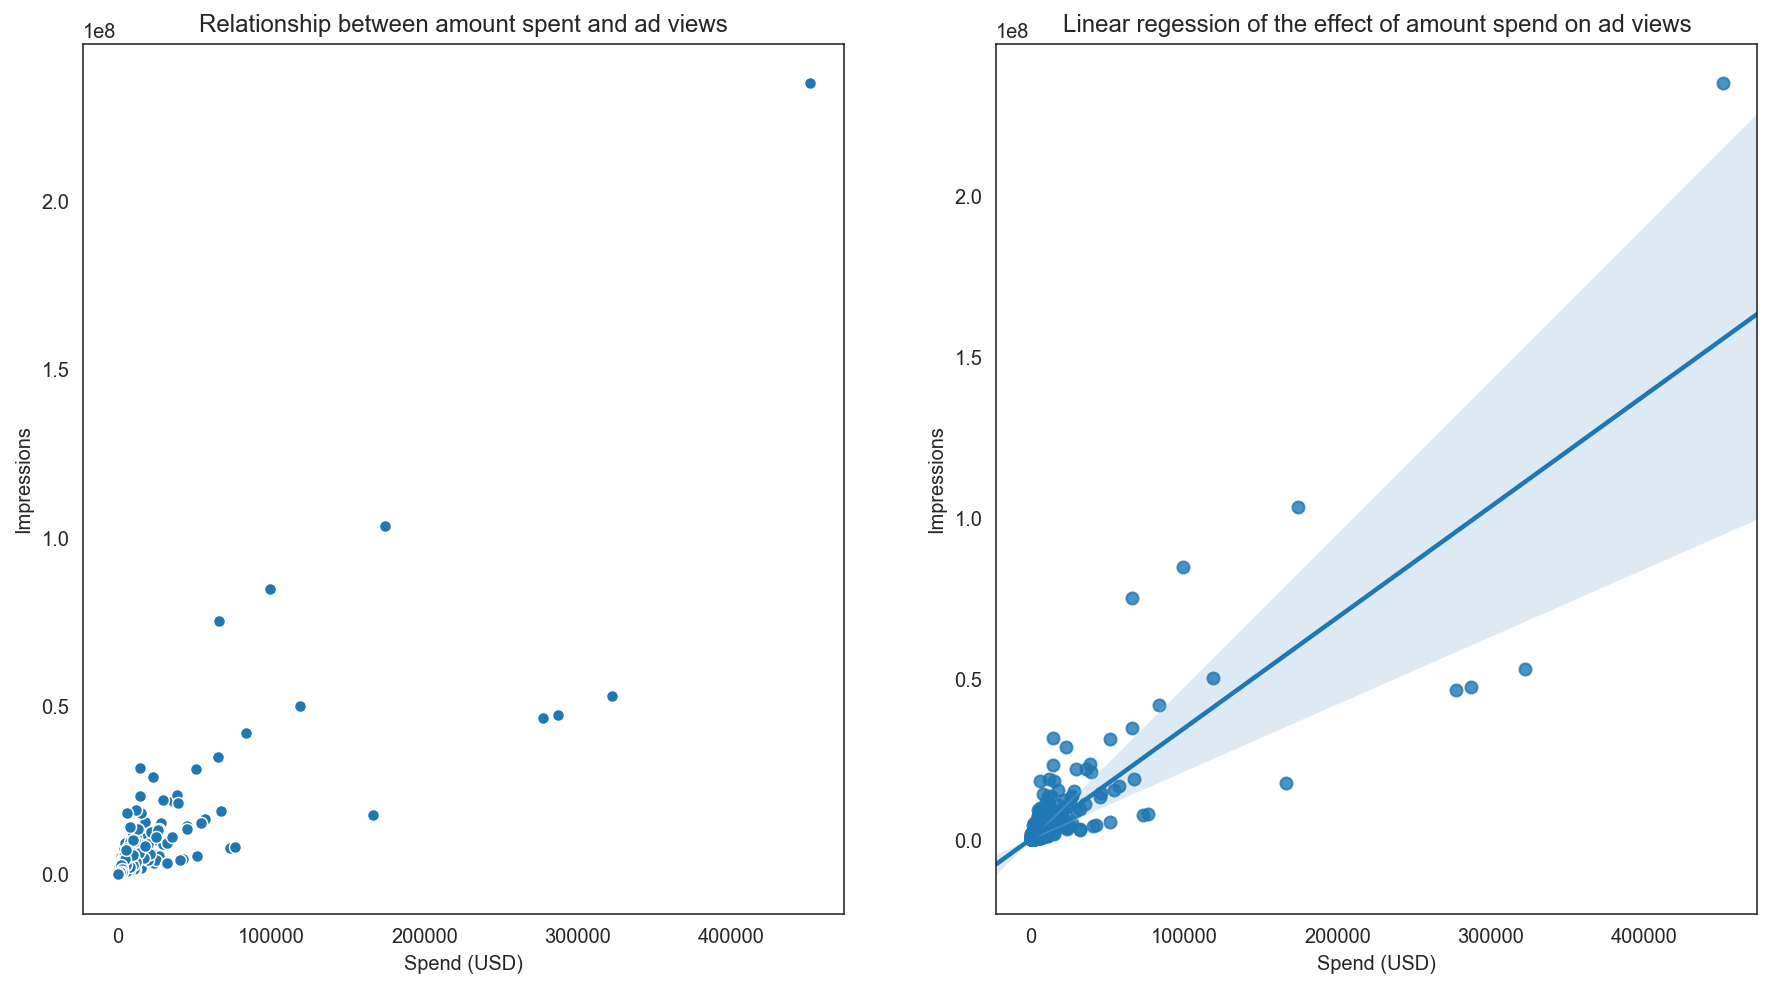

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8))

sns.scatterplot(x="Spend (USD)" , y = 'Impressions', data=df, ax = ax1)
ax1.set_title('Relationship between amount spent and ad views')



#linear regression between amount spent on an ad and the impressions/views of the ad
sns.regplot(x="Spend (USD)" , y = 'Impressions', data=df, ax = ax2)
ax2.set_title('Linear regession of the effect of amount spend on ad views')

#the linear reegression plot reveals that on the lower side of the amount spend per ad, there is...
#a stronger relationship between the two variables, overall the data shows somewhat of a direct relationship...
#between the two
#the plot also reveals outliers of very expensive ads with less views than less expensive ads with more views
#I can say, generally, that that the more expensive an ad the more views, but would have to generate a model
#to explore this in depth

The next bivariate analysis I want to examine is the relationship between the amount spent on ad campaigns by country of advertiser. Immediately I can tell that that US advertisers not only lead all countries in total ad campaigns but also has spent the most on a single ad.

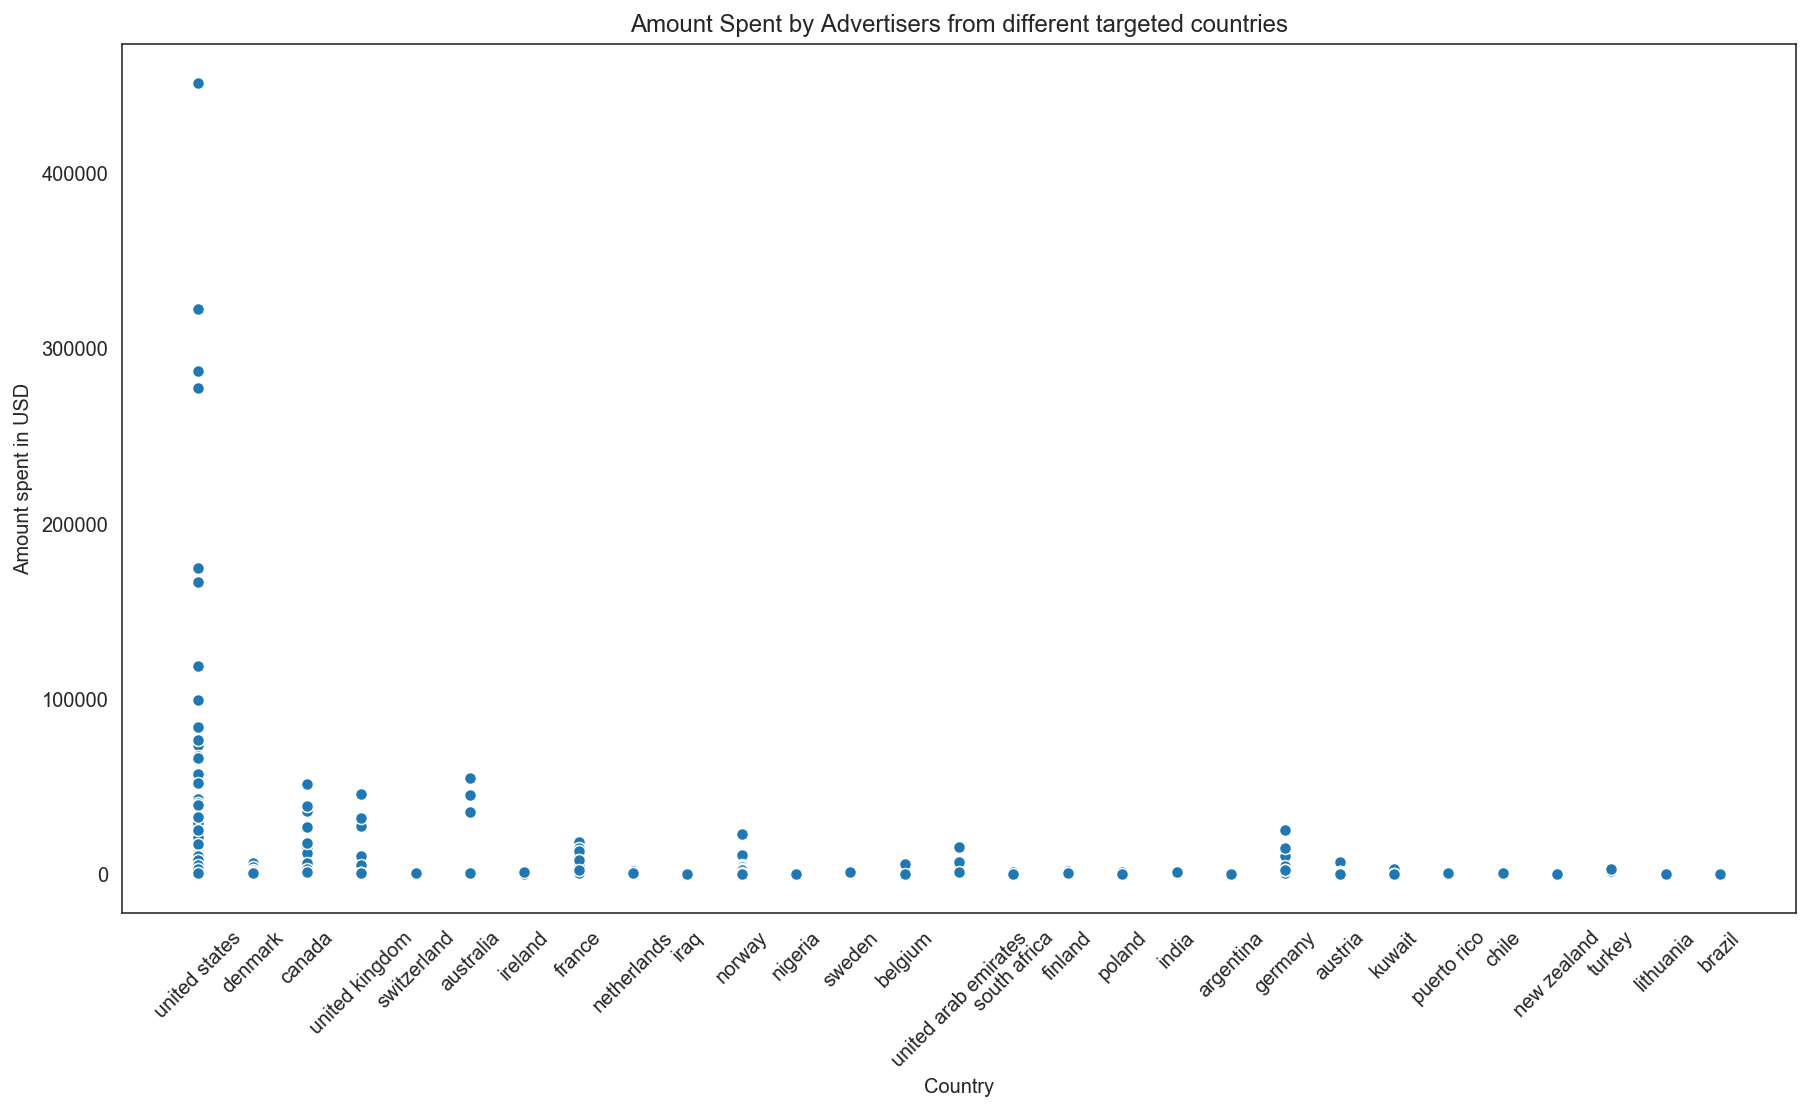

In [17]:

plt.figure(figsize=(15,8))
sns.scatterplot(x="CountryCode", y="Spend (USD)", data=df)
plt.title('Amount Spent by Advertisers from different targeted countries')
plt.ylabel('Amount spent in USD')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.show();


The table below on the left shows that on average, UAE advertisers spends more per ad campaign than any other country. The table in the middle reveals that the US advertisers have spent the most on a single campaign followed by the max spent on a single ad by other countries.


In [18]:
gpmean = df.groupby('CountryCode').mean()[['Spend (USD)']].sort_values('Spend (USD)', ascending = False).head(10)
gpmax = df.groupby('CountryCode',sort= True).max()[['Spend (USD)']].sort_values('Spend (USD)', ascending = False).head(10)
uae = df[df['CountryCode'] == 'united arab emirates']
multi_table([gpmean, gpmax, uae])

#investigating further, even though UAE advertisers only made 7 ads from 2018-2019, on average, they spent the most...
# per ad of all countries


Below is the average amount spent per ad by country. You can visually see the data from the first table above

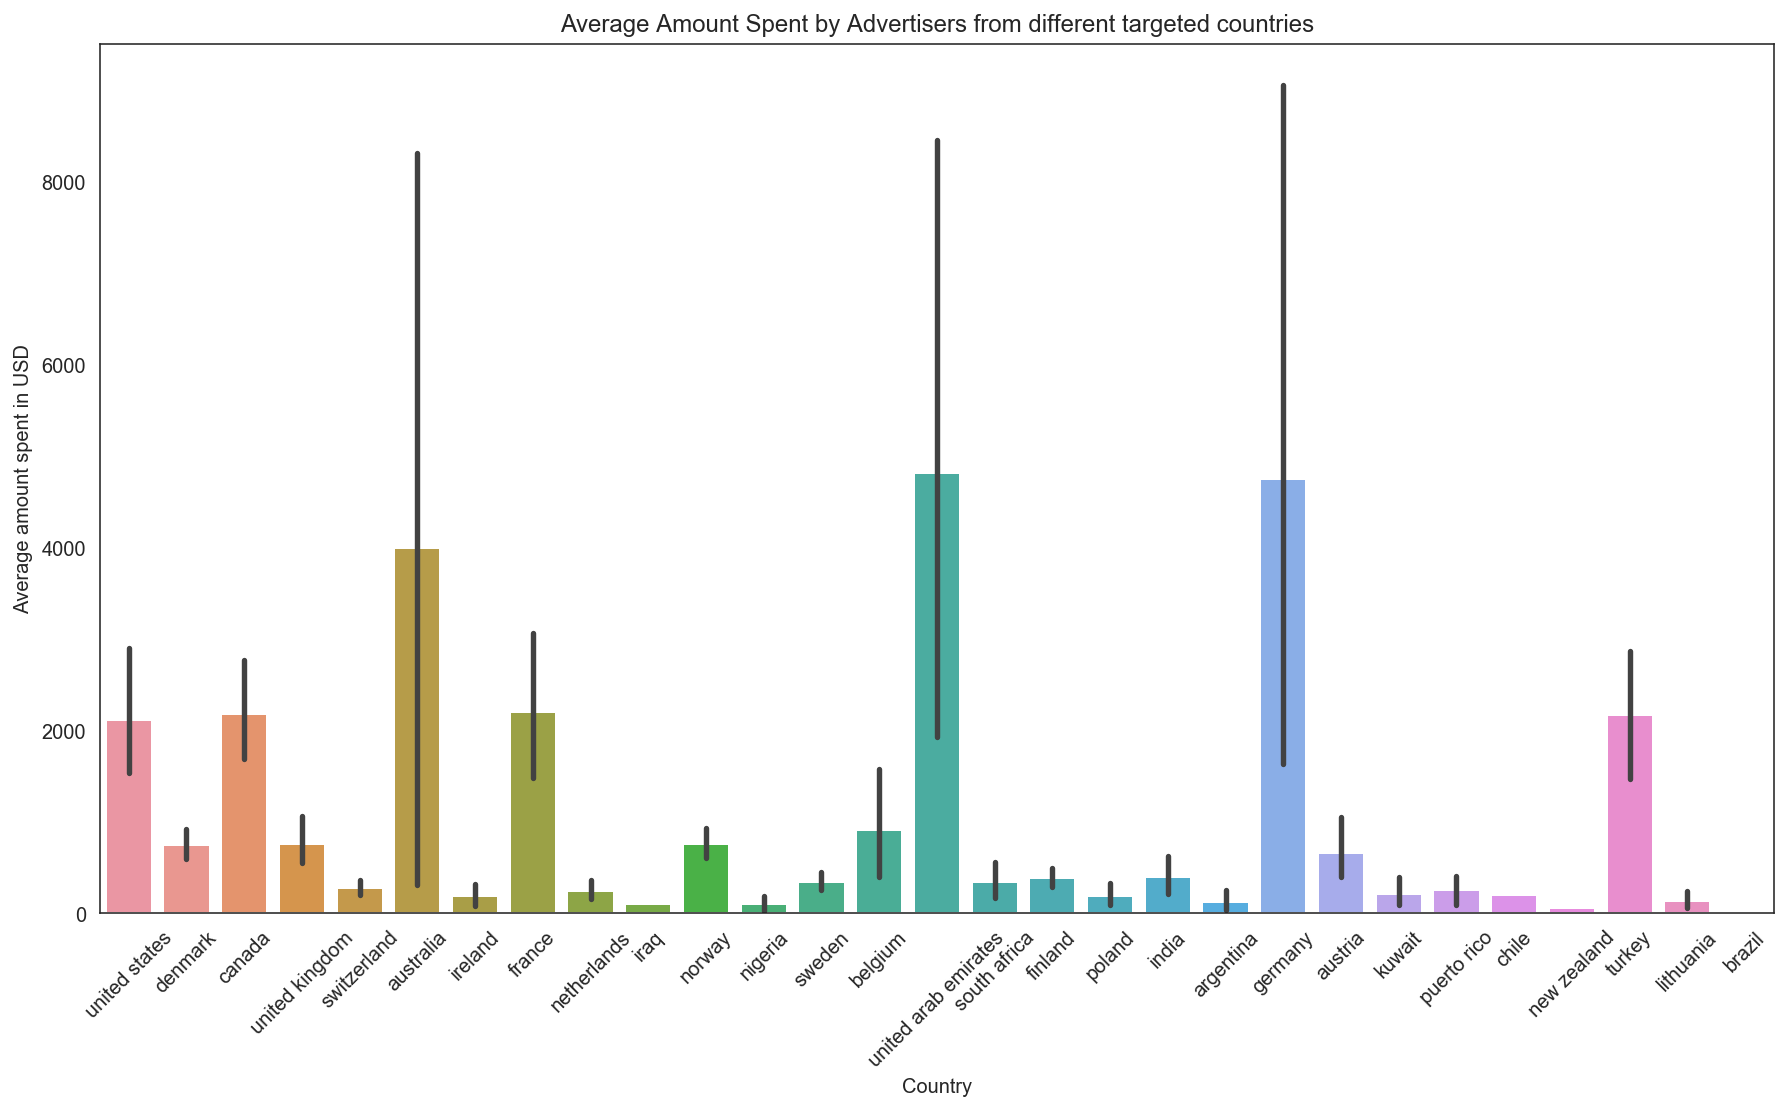

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x="CountryCode", y="Spend (USD)", data=df)
plt.title('Average Amount Spent by Advertisers from different targeted countries')
plt.ylabel('Average amount spent in USD')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.show();

This plot reveals that US advertisers achieve more impressions, however, with the consideration that by and large, US advertisers also produced over 50% of all snapchat ads from 2019-2019.

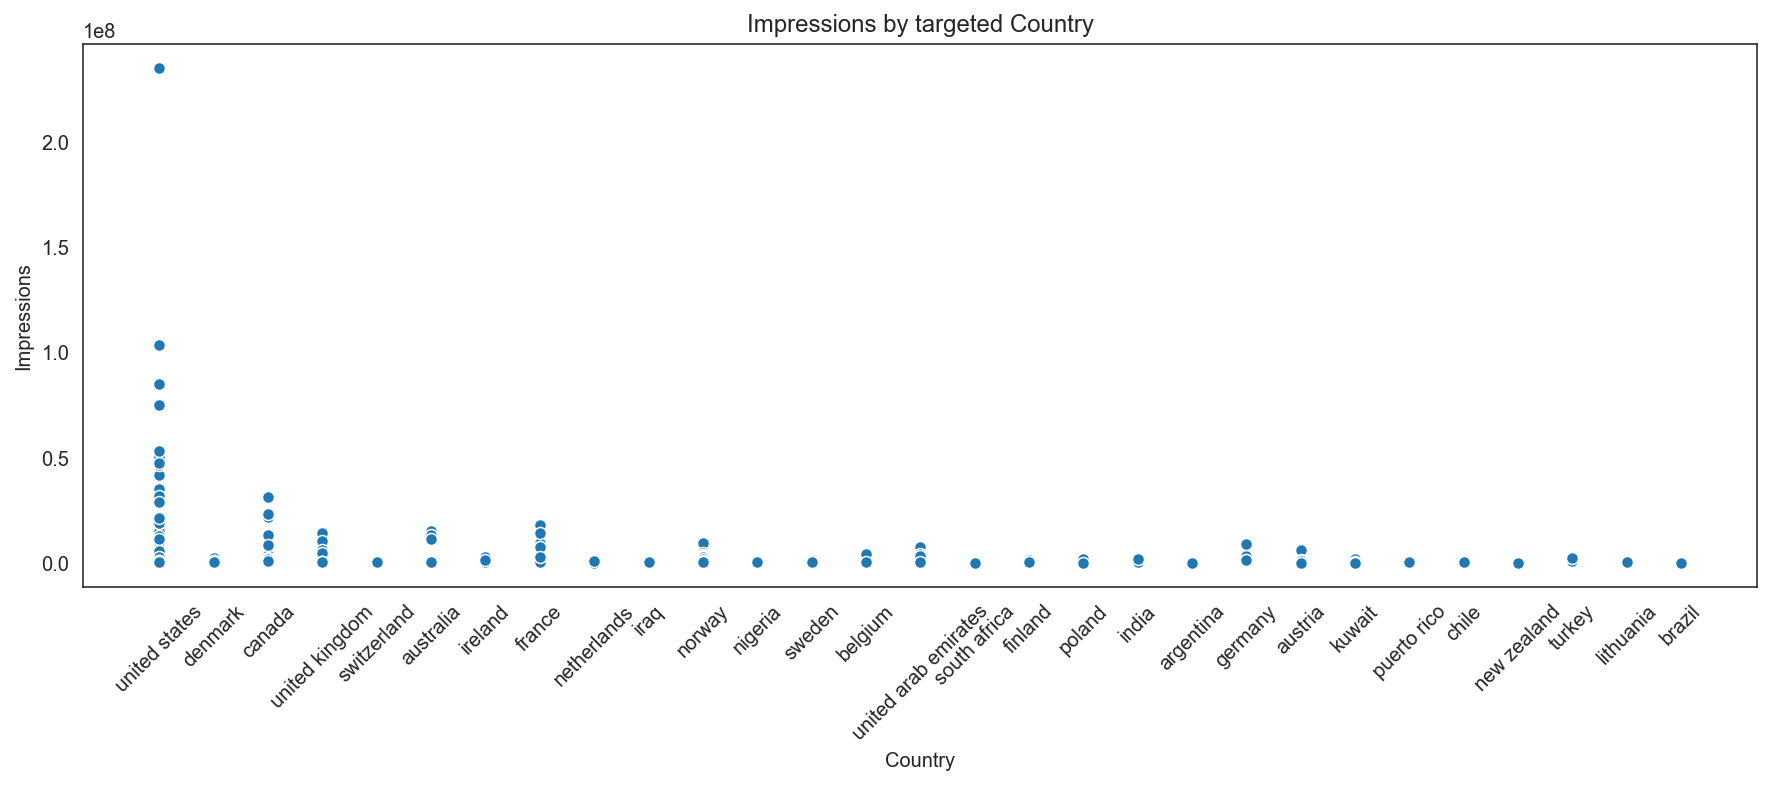

In [20]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="CountryCode", y="Impressions", data=df)
plt.title('Impressions by targeted Country')
plt.ylabel('Impressions')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.show();

Advertisers that either did not target a specific language for their ad, or targeted english speakers achived the most views for their ad. Keep in mind US advertisers produced over 50% of all snapchat ads from 2018-2019.

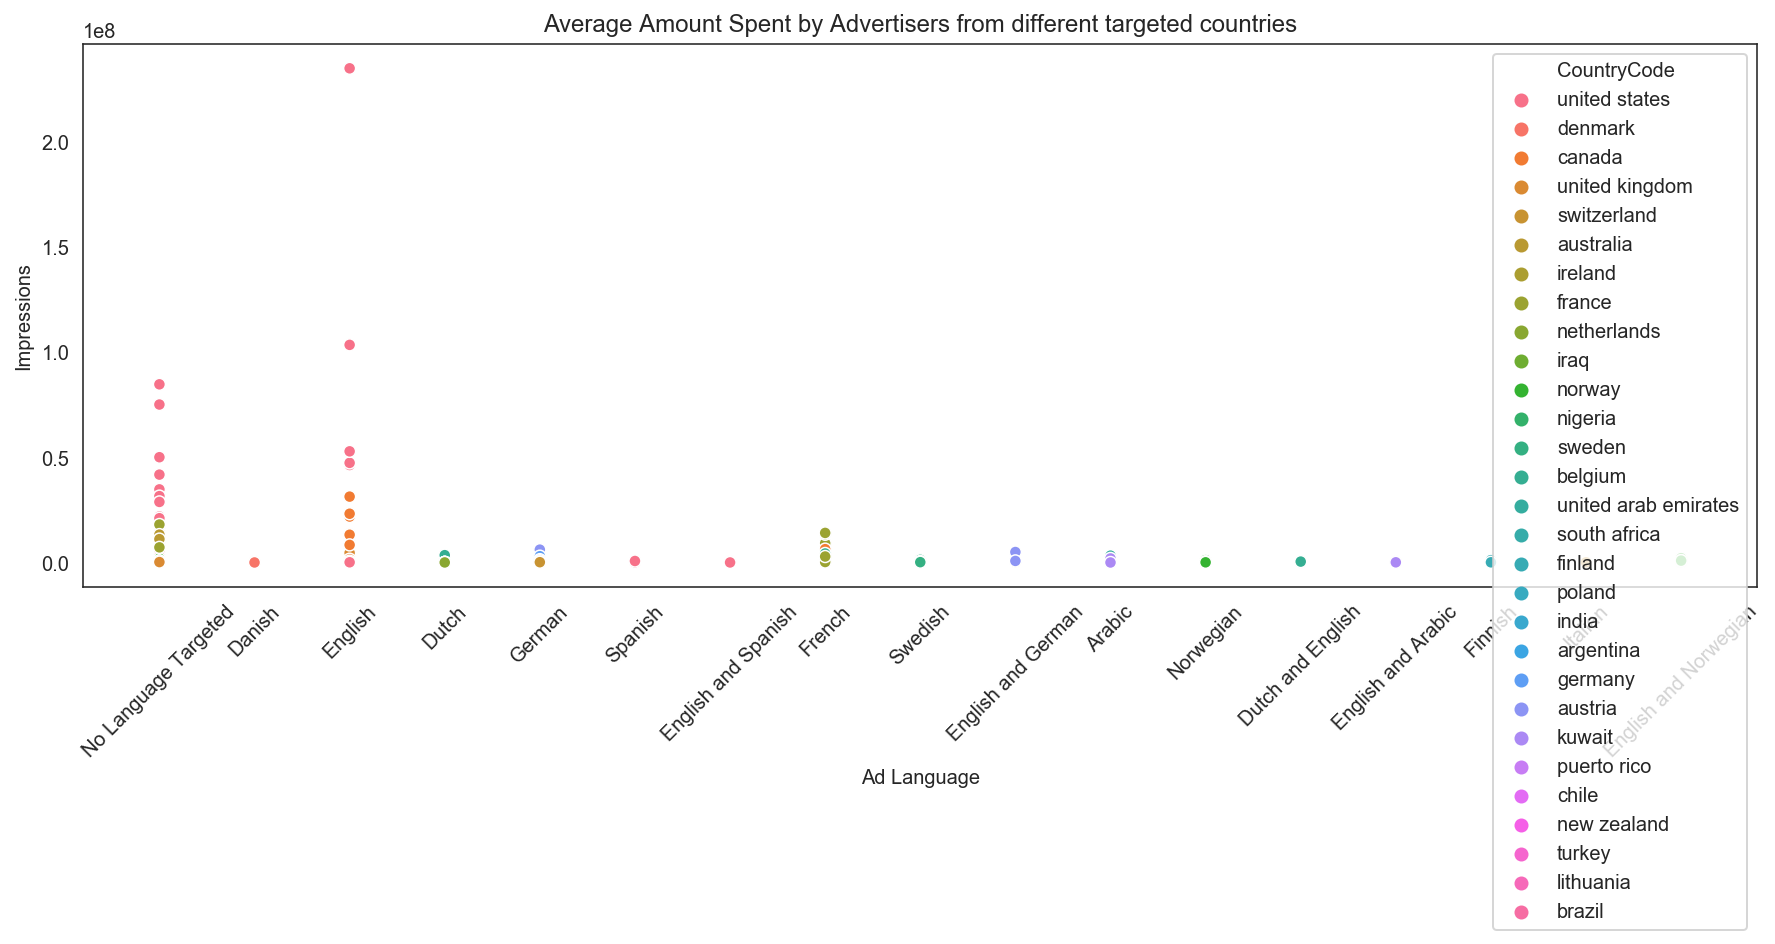

In [21]:
plt.figure(figsize=(15,5))

sns.scatterplot(x="AdLanguage", y="Impressions", data=df, hue = "CountryCode")
plt.title('Average Amount Spent by Advertisers from different targeted countries')
plt.ylabel('Impressions')
plt.xlabel('Ad Language')
plt.xticks(rotation = 45)
plt.show();


See that 60% of the advertisers that did not target a language were US advertisers. The UK makes up about 15% of the companies that did not target languages. Norway makes up about 12% of the companies that did not target languages.

In [22]:
df[df['AdLanguage'] == 'No Language Targeted']['CountryCode'].value_counts() / nlt.shape[0]


united states           0.597816
united kingdom          0.151301
norway                  0.121105
denmark                 0.023129
france                  0.012528
netherlands             0.010922
finland                 0.009958
sweden                  0.008995
australia               0.008031
ireland                 0.008031
kuwait                  0.007710
austria                 0.007710
india                   0.005782
poland                  0.004497
switzerland             0.003855
south africa            0.003212
belgium                 0.003212
germany                 0.002891
nigeria                 0.002570
argentina               0.001927
turkey                  0.001285
united arab emirates    0.001285
lithuania               0.000964
chile                   0.000321
puerto rico             0.000321
canada                  0.000321
iraq                    0.000321
Name: CountryCode, dtype: float64

The plot below shows that ads who targeted English, and ads that targeted both English and German achieved the highest average views for an ad.

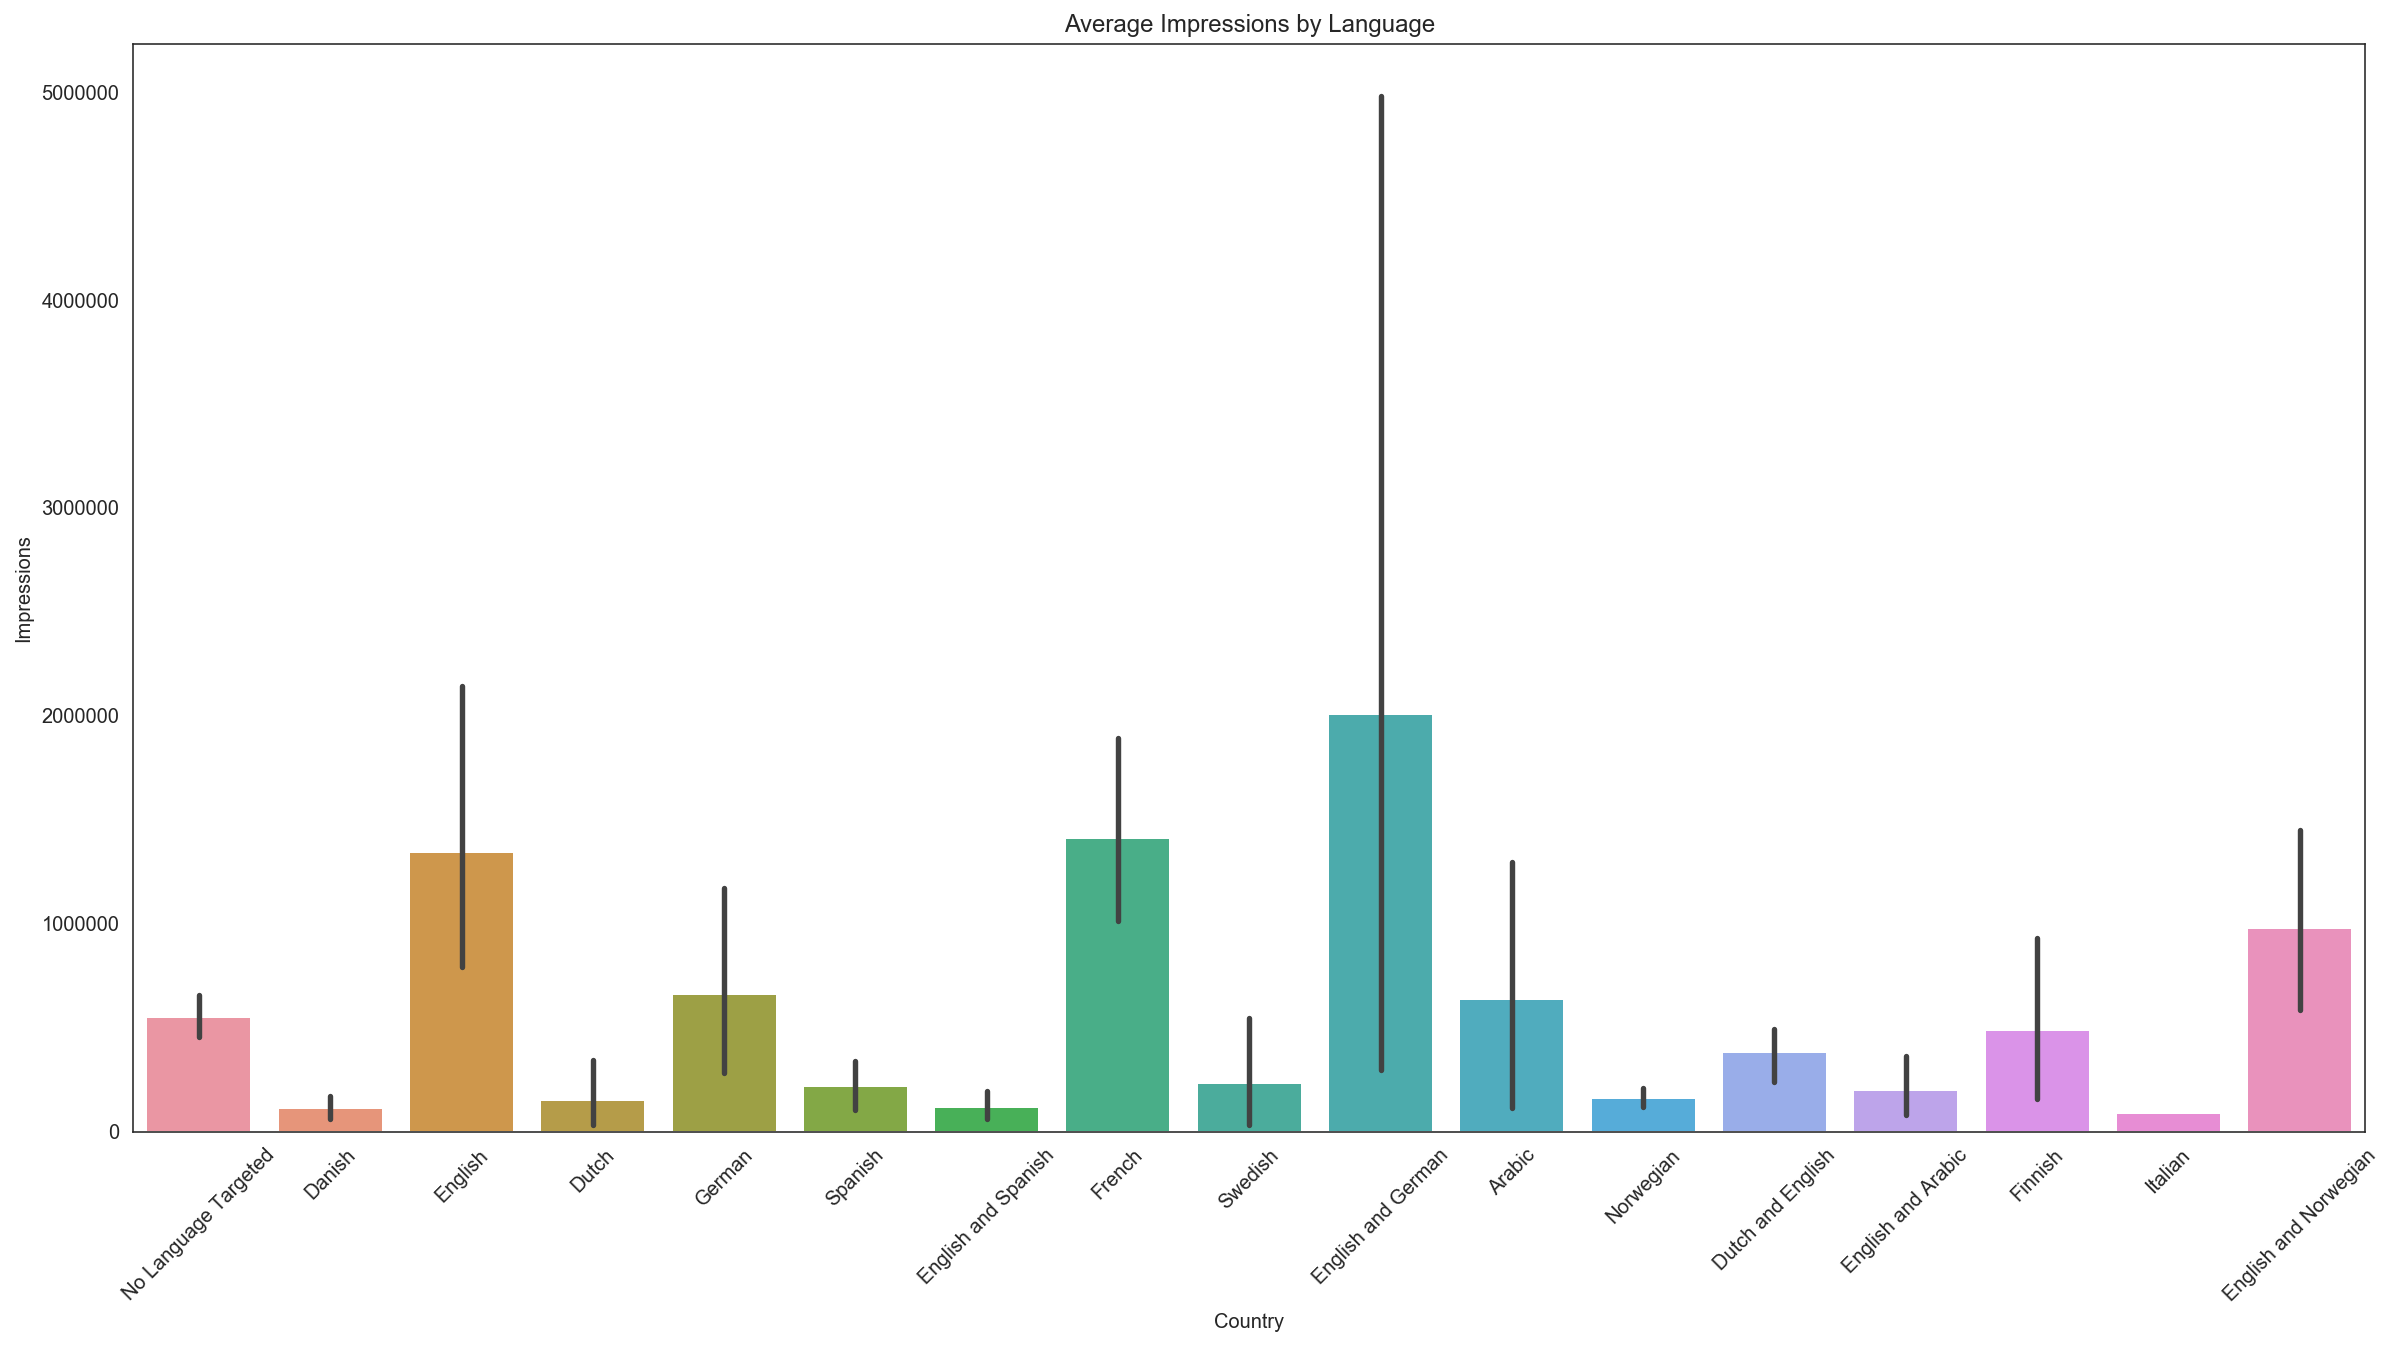

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x="AdLanguage", y="Impressions", data = df)
plt.title('Average Impressions by Language')
plt.ylabel('Impressions')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.show();

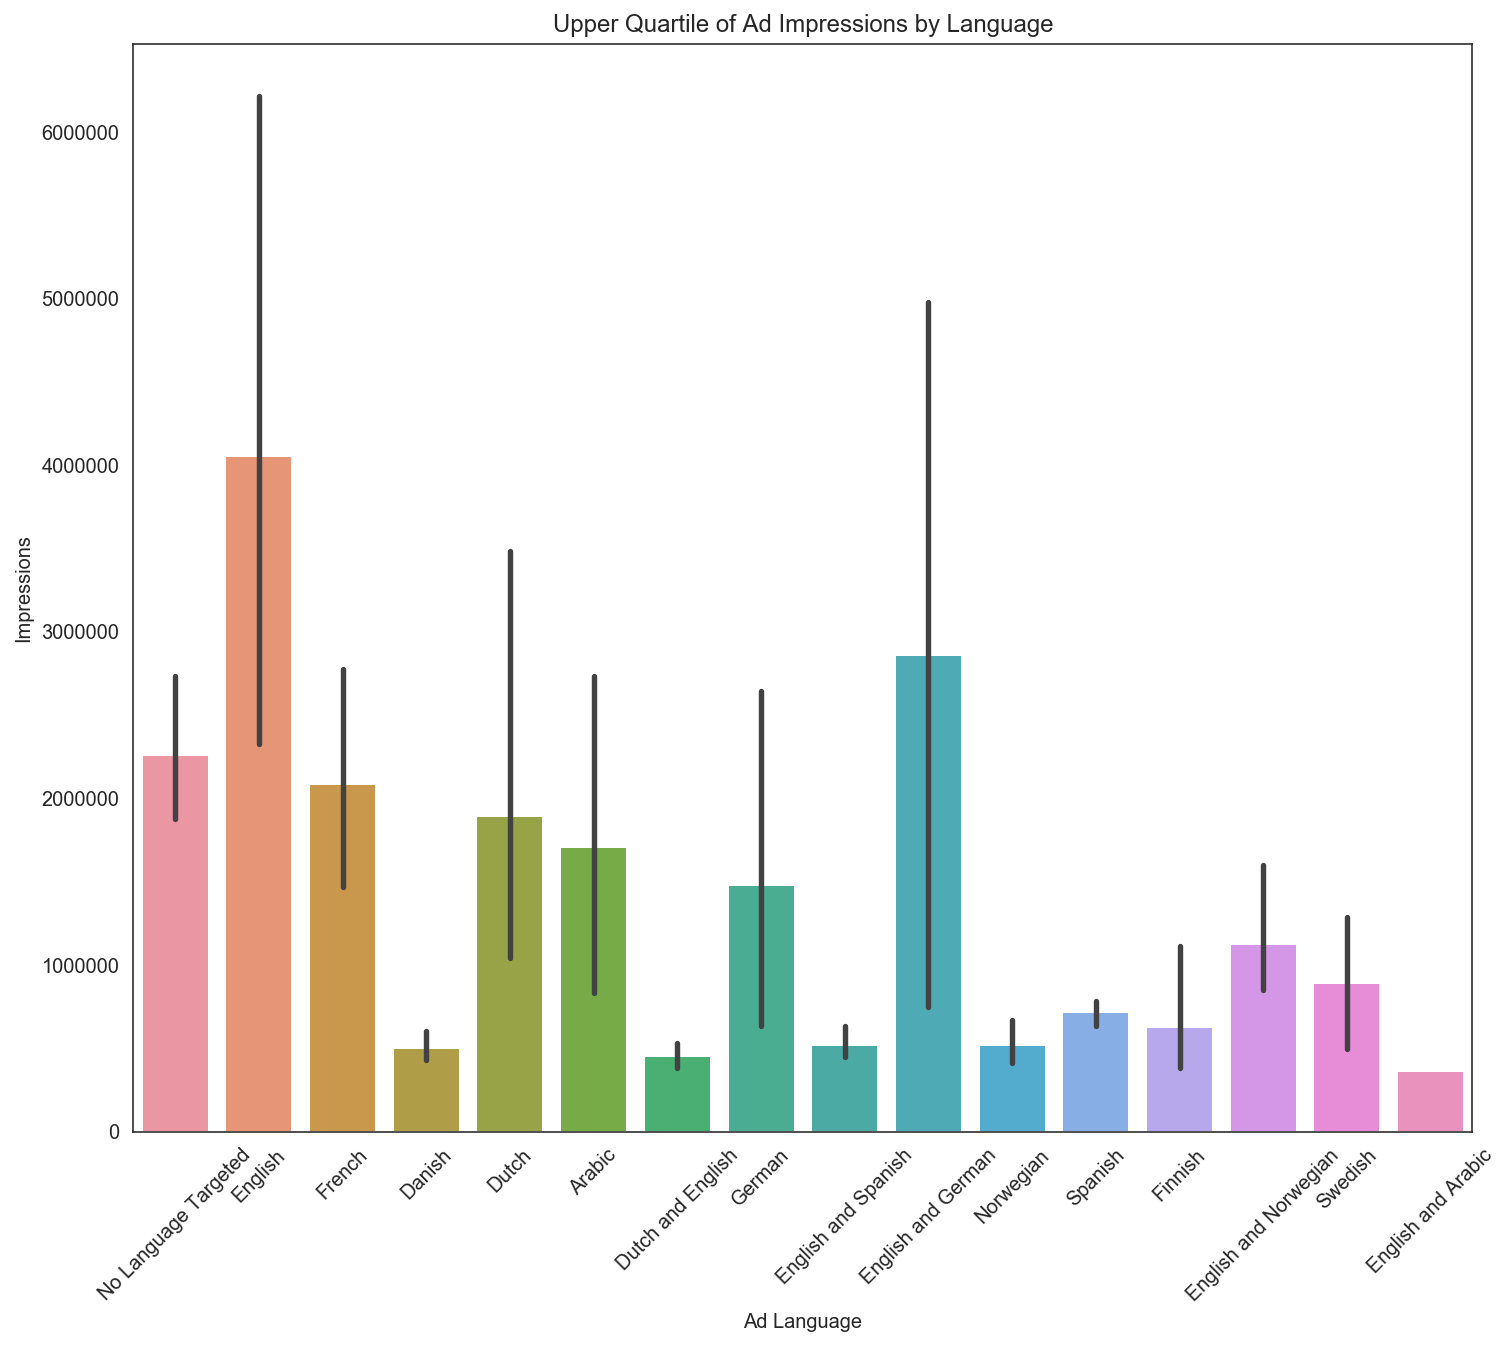

In [24]:
# subset of data that is above the upper quartile for impressions
#I do this in order to isolate the data with only the highest ad views
threeq = df[df["Impressions"] >= df["Impressions"].describe()[6]]
threeq

plt.figure(figsize=(12,10))
sns.barplot(x="AdLanguage", y="Impressions", data = threeq)
plt.title('Upper Quartile of Ad Impressions by Language')
plt.ylabel('Impressions')
plt.xlabel('Ad Language')
plt.xticks(rotation = 45)
plt.show();

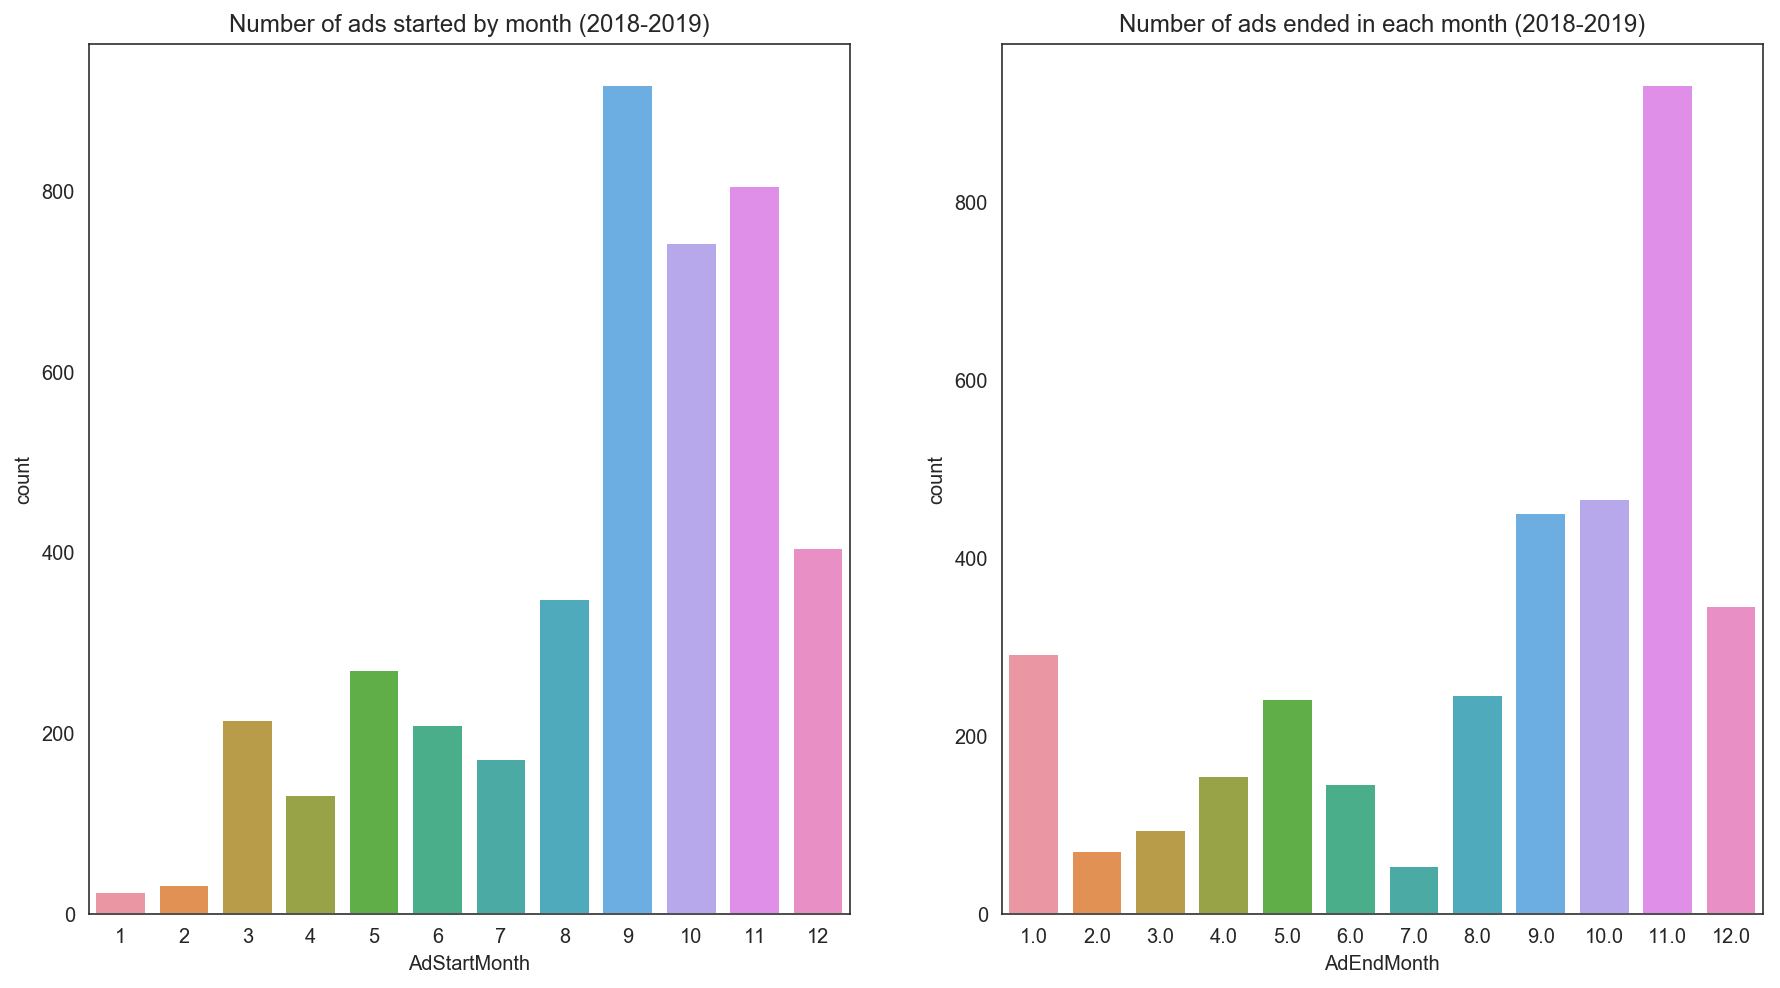

In [25]:
#make a column of the month when an Ad was started
df['AdStartMonth'] = df['StartDate'].dt.month
df['AdEndMonth'] = df['EndDate'].dt.month
#this graph shows the number of ads produced in each month
#seems like the fall and winter months dominate as the primary ad seasons

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8))
sns.countplot(x = 'AdStartMonth', data = df, ax = ax1)
ax1.set_title('Number of ads started by month (2018-2019)')
sns.countplot(x = 'AdEndMonth', data = df, ax = ax2)
ax2.set_title("Number of ads ended in each month (2018-2019)")
plt.show();

The plot below is meant to show the times of the year when ads get the most views, separated by their start and end dates. When ads are being started I observe that approximately every two months, beginning in February,ads get more views. For the end date of ads, ads, that end around July and December get the most views. While this this says nothing about the duration that advertisers should set their ads for, rather, it says more about the political climate time frame for which advertisers might try to produce their ads in.

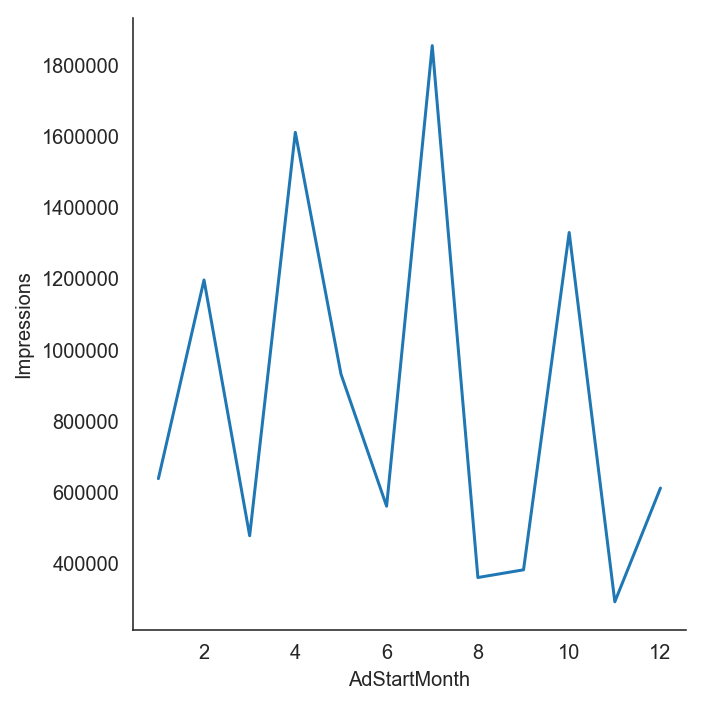

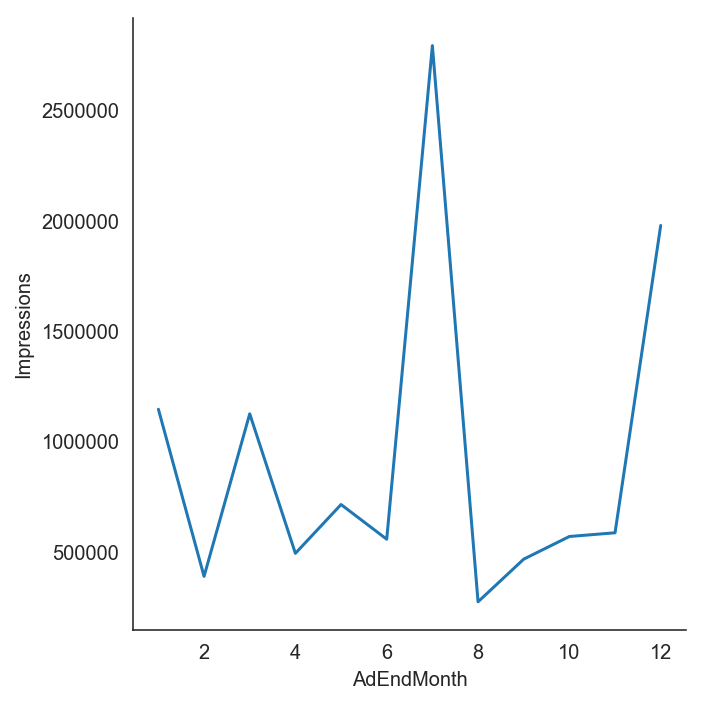

In [26]:
sns.relplot(x="AdStartMonth", y="Impressions", kind="line", data=df, ci =None)
sns.relplot(x="AdEndMonth", y="Impressions", kind="line", data=df, ci =None)



### Hypothesis Test
I decided to focus on the characteristics of ads with a large reach (high amount of impressions). To find out more about ads with many impressions, I wanted to test if campaigns with ads with more impressions have spent more (Spend (USD)).

- Question: Do ads in the top 25% of impressions have higher spending campaigns (Spend (USD))?
- Test: Permutation test using difference in means as the test statistic.
- Null Hypothesis: Campaigns with ads in the top 25% of impressions spend about the same as all campaigns on average.
- Alternate Hypothesis: Campaigns with ads in the top 25% of impressions spend more than all campaigns on average.

Level of significance: p-value < .01

- Result: p-value = 0
- Observed test-statistic: 5763.92 USD
- Average of 1,000 trials: -4.45 USD (close to 0 as expected)

These results clearly show that the null hypothesis should be rejected.

I chose this test statistic because the values being compared are numerical. Additionally, there are multiple other factors that affect campaign spending, so taking the mean of many campaigns helps to account for this variation.
The null hypothesis is the "boring" option. It represents the scenario where there is no significant statistical difference, meaning the distributions are the same/similar. The alternate hypothesis is the opposite of this. It represents the scenario where there is a significant difference, meaning the distributions are also different.



### Assessment of Missingness

In [27]:
# helper methods for performing tests
def permutation_test(data, col, group_col, test_statistic, N=1000):
    obs = test_statistic(data, col, group_col)
    shuffled_stats = []
    
    for _ in range(N):
        shuffled = data[group_col].sample(frac=1, replace=False).reset_index(drop=True)
        with_shuffled = data[[col]].assign(shuffled=shuffled)
        shuffled_stat = test_statistic(with_shuffled, col, 'shuffled')
        shuffled_stats.append(shuffled_stat)

    shuffled_stats = np.array(shuffled_stats)

    return shuffled_stats, obs

def diff_in_means(data, col, group_col):
    return data.groupby(group_col)[col].mean().diff().iloc[-1]

def abs_diff_in_means(data, col, group_col):
    return abs(data.groupby(group_col)[col].mean().diff().iloc[-1])


def tvd(data, col, group_col):
    tvd = (
        data
        .pivot_table(
            index=col, 
            columns=group_col, 
            aggfunc='size', 
            fill_value=0
        )
        .apply(lambda x: x / x.sum())
        .diff(axis=1).iloc[:, -1].abs().sum() / 2
        )

    return tvd


def ks(data, col, group_col):
    valA, valB = data[group_col].unique()
    ks, _ = ks_2samp(
        data.loc[data[group_col] == valA, col],
        data.loc[data[group_col] == valB, col]
    )

    return ks

def categorical_perm_test_tvd(data, col, group_col, N=1000):
    empirical = data.pivot_table(columns=group_col, index=col, values=None, aggfunc='size')\
            .fillna(0)\
            .apply(lambda x:x/x.sum())
    obs = np.sum(np.abs(empirical.diff(axis=1).iloc[:,-1])) / 2
    
    narrowed = data.copy()[[col, group_col]]
    tvds = []
    
    for i in range(N):

        # shuffle the rows
        shuffled_rows = (
            narrowed[col]
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )

        # put them in a table
        shuffled = (
            narrowed.assign(**{'Shuffled Rows': shuffled_rows})
        )

        # compute the tvd
        shuffled_emp_distributions = (
            shuffled
            .pivot_table(columns=group_col, index='Shuffled Rows', values=None, aggfunc='size')
            .fillna(0)
            .apply(lambda x:x/x.sum())
        )

        tvd = np.sum(np.abs(shuffled_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
        # add it to the list of results

        tvds.append(tvd)
        
    return np.array(tvds), obs


#### Search for any NMAR columns

In [28]:
# find the columns with null data
withnull = {}
for c in df.columns:
    nulls = df[c].isnull().sum()
    
    if nulls:
        withnull[c] = nulls
        
withnull = pd.Series(withnull)
withnull


EndDate                            777
CandidateBallotInformation        3698
Gender                            3883
AgeBracket                         353
Regions (Included)                3091
Regions (Excluded)                4223
Electoral Districts (Included)    4203
Electoral Districts (Excluded)    4268
Radius Targeting (Included)       3962
Radius Targeting (Excluded)       4256
Metros (Included)                 4092
Metros (Excluded)                 4251
Postal Codes (Included)           3425
Postal Codes (Excluded)           4151
Location Categories (Included)    4252
Location Categories (Excluded)    4266
Interests                         3174
OsType                            4242
Segments                          1253
Language                          3113
AdvancedDemographics              4159
Targeting Connection Type         4268
Targeting Carrier (ISP)           4268
CreativeProperties                 740
Ad Duration                        777
AdEndMonth               

In [29]:
# remove columns with data missing by design
withnull.drop(withnull.index[2:], inplace=True)
# these are the only columns with null data not missing by design
withnull

EndDate                        777
CandidateBallotInformation    3698
dtype: int64

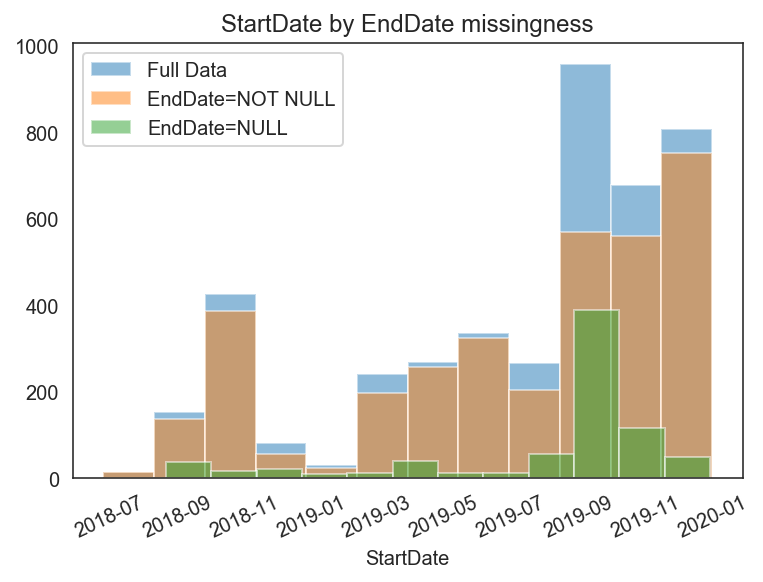

In [30]:
# checking EndDate

df['EndDate_null'] = df['EndDate'].isnull()
# plot StartDate density by EndDate missingness
x = df['StartDate']
y = df[df['EndDate_null'] == False]['StartDate']
z = df[df['EndDate_null']]['StartDate']

plt.hist(x, bins = 12, alpha=0.5, label='x')
plt.hist(y, bins = 12, alpha=0.5, label='y')
plt.hist(z, bins = 12, alpha=0.5, label='z')
plt.xticks(rotation = 25)
plt.legend(['Full Data', 'EndDate=NOT NULL', 'EndDate=NULL'])
plt.xlabel('StartDate')
plt.title('StartDate by EndDate missingness');



p-value:  0.0


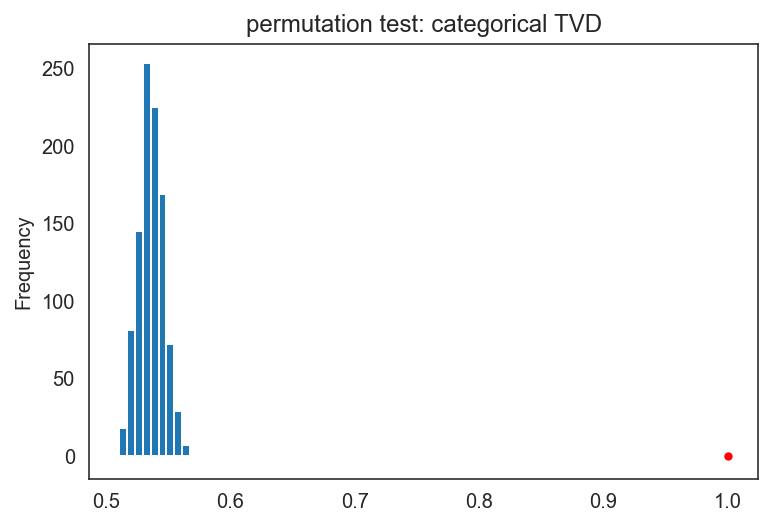

In [31]:
# perform permutation test using tvd for StartDate by EndDate missingess
trials, obs = categorical_perm_test_tvd(df, 'StartDate', 'EndDate_null', 1000)
# plot results and print p-value
pd.Series(trials).plot(kind='hist', title='permutation test: categorical TVD')
plt.scatter(obs, 0, color='r', s=10);
pval = trials[trials >= obs].size / trials.size
print('p-value: ', pval)


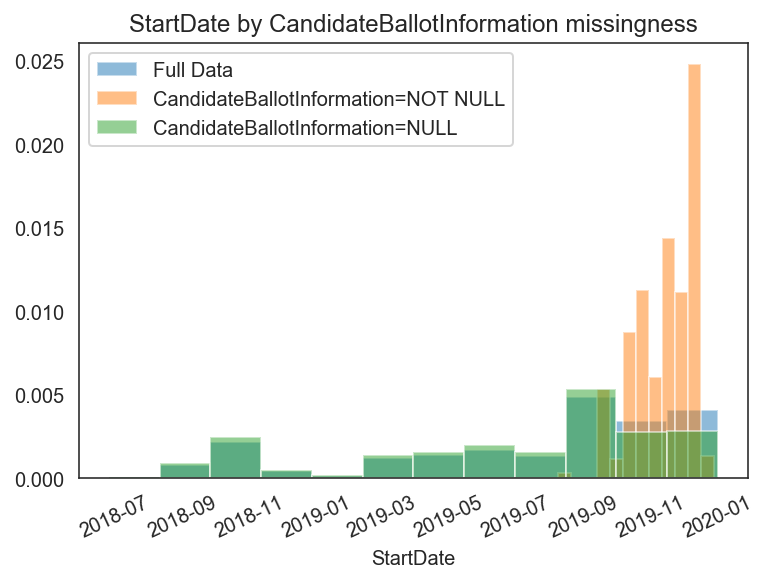

In [32]:
# checking CandidateBallotInformation
df['CBI_null'] = df['CandidateBallotInformation'].isnull()

x = df['StartDate']
y = df[df['CBI_null'] == False]['StartDate']
z = df[df['CBI_null']]['StartDate']

plt.hist(x, bins = 12, alpha=0.5, density = True)
plt.hist(y, bins = 12, alpha=0.5,density = True)
plt.hist(z, bins = 12, alpha=0.5, density = True)


# # plot StartDate density by CandidateBallotInformation missingness
# plt.figure(figsize=(15,8))
# plt.hist([df['StartDate'], df[df['CBI_null'] == False]['StartDate'], df[df['CBI_null']]['StartDate']],bins=12, density=True)
plt.legend(['Full Data', 'CandidateBallotInformation=NOT NULL', 'CandidateBallotInformation=NULL'])
plt.xlabel('StartDate')
plt.xticks(rotation =25)
plt.title('StartDate by CandidateBallotInformation missingness');


p-value:  0.0


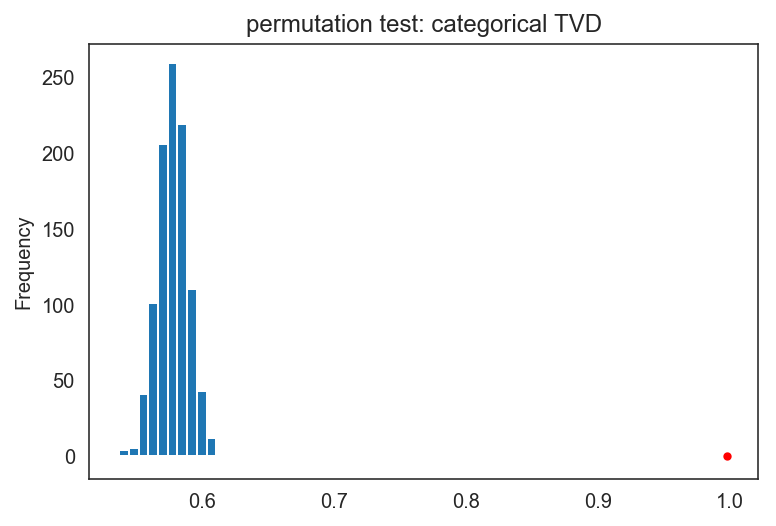

In [33]:
# perform permutation test using tvd for StartDate by CandidateBallotInformation missingess
trials, obs = categorical_perm_test_tvd(df, 'StartDate', 'CBI_null', 1000)
# plot results and print p-value
pd.Series(trials).plot(kind='hist', title='permutation test: categorical TVD')
plt.scatter(obs, 0, color='r', s=10);
pval = trials[trials >= obs].size / trials.size
print('p-value: ', pval)


##### Find which columns EndDate is dependent on

Null Hypothesis: The missingness of EndDate is NOT dependent on the column.

Alternative Hypothesis: The missingness of EndDate IS at least partially dependent on the column.

Level of significance: p-val < .05


In [34]:
# check dependence of EndDate on column Spend (USD)
# perform permutation tests using different test stats

trials_dim, obs_dim = permutation_test(df, 'Spend (USD)', 'EndDate_null', abs_diff_in_means, 1000)
trials_tvd, obs_tvd = permutation_test(df, 'Spend (USD)', 'EndDate_null', tvd, 1000)
trials_ks, obs_ks = permutation_test(df, 'Spend (USD)', 'EndDate_null', ks, 1000)


p-value:  0.005


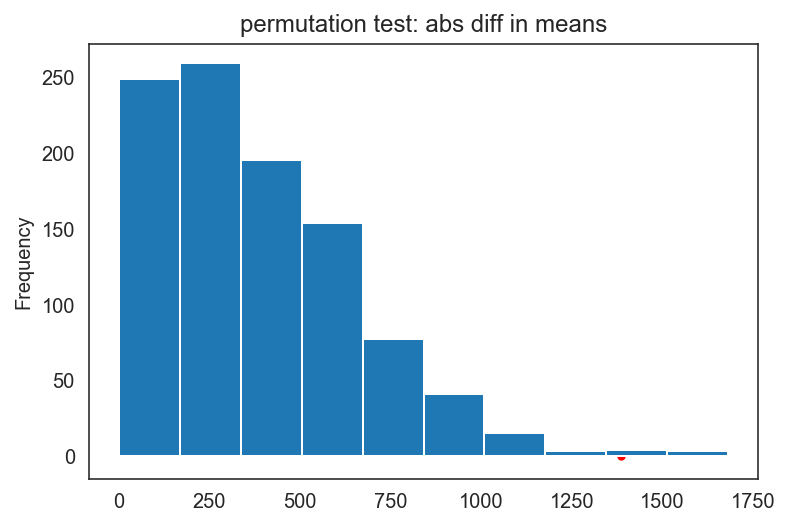

In [35]:
pd.Series(trials_dim).plot(kind='hist', title='permutation test: abs diff in means')
plt.scatter(obs_dim, 0, color='r', s=10)
pval = trials_dim[trials_dim >= obs_dim].size / trials_dim.size
print('p-value: ', pval)


p-value:  0.001


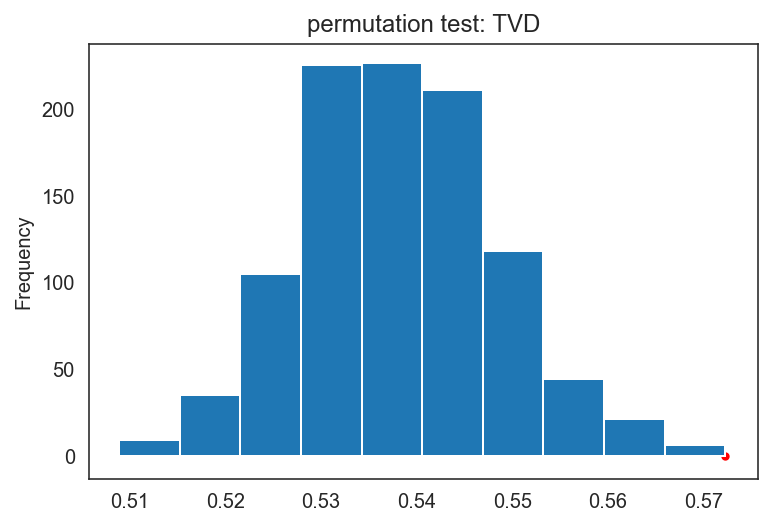

In [36]:
pd.Series(trials_tvd).plot(kind='hist', title='permutation test: TVD')
plt.scatter(obs_tvd, 0, color='r', s=10)
pval = trials_tvd[trials_tvd >= obs_tvd].size / trials_tvd.size
print('p-value: ', pval)


p-value:  0.0


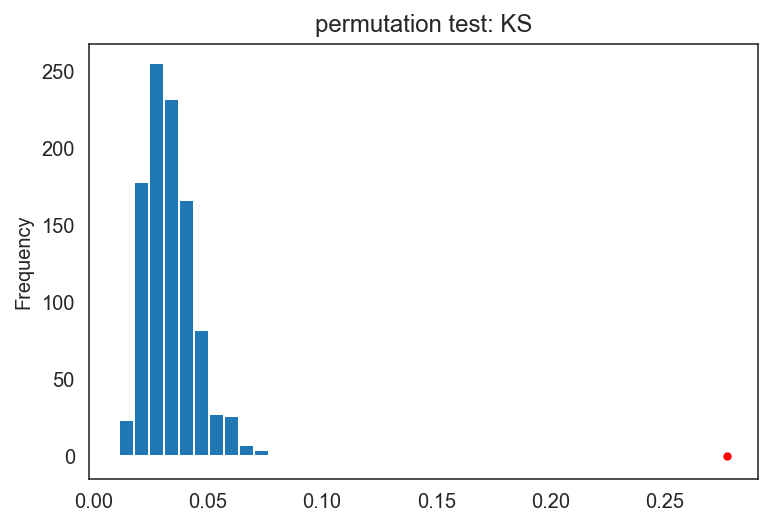

In [37]:
pd.Series(trials_ks).plot(kind='hist', title='permutation test: KS')
plt.scatter(obs_ks, 0, color='r', s=10)
pval = trials_ks[trials_ks >= obs_ks].size / trials_ks.size
print('p-value: ', pval)


In [38]:
# Now find a column it is not dependent on
# check dependence of EndDate on column ADID
# perform permutation test using tvd for categorical data

trials, obs = categorical_perm_test_tvd(df, 'ADID', 'EndDate_null', 1000)


p-value:  1.0


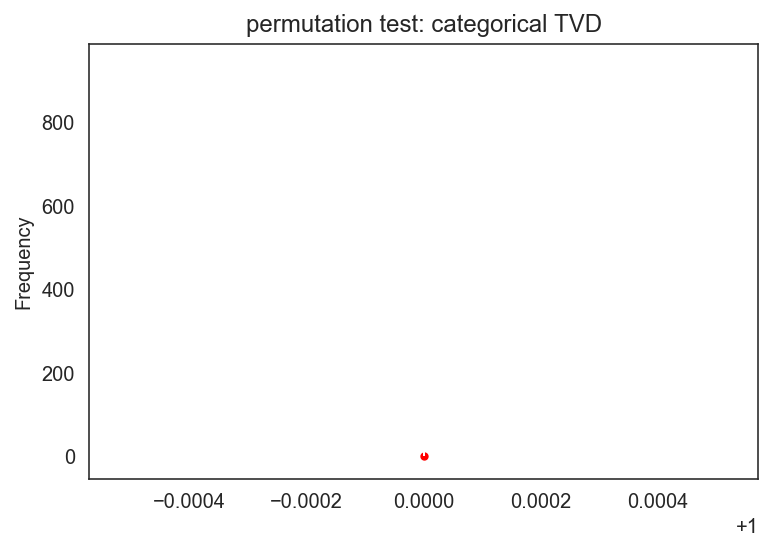

In [39]:
pd.Series(trials).plot(kind='hist', title='permutation test: categorical TVD')
plt.scatter(obs, 0, color='r', s=10)
pval = trials[trials >= obs].size / trials.size
print('p-value: ', pval)


In [40]:
obs, trials[:10]

(1.0, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [41]:
df['ADID'].value_counts()

bb579e8ed586a63caf2d5a7c76a952cfb5b81e1e154db5cc585a7443aafba438    1
95ee5cbc03c3dae9d550e418946eb0c8c971316ccf5823528abc50d9735d22a7    1
9024d02d1366985ca07a5e0974dce0684a897efda31396b509f2ae55fd9eecc7    1
c41b1d35b50c4554ba34f7e711e5c8ee6d99fb4404a9bf36ed54c80f95f5cd21    1
3ecc168c4d3564fd9991127a9b3f06fd39f149eb868b16c06688670465317d23    1
faa24be03c1e66320a737c1d6c2751c209d548f96eeca2e3499f4f464464257a    1
4abe94810c797f80c8a51a624e637f29921c515e9d0b9cbe9042e72a165b0694    1
72da0596d7cac00a481c24987c626f6c310415a8c5160aa0d4fd3b4a59830457    1
75f1050fdaeaa1f93c6a8805997e40af6ad977a440976776bf01323ff131cdeb    1
277fe91bc24b3e531c25e37a055fbc0f6e6fcba76234c564aadf606da033c626    1
ca23514ea61eb9e685ce3c19fad93f15ca219f08d74f33c0cf94dcdb07dad53f    1
feafead548693134a427f0caa7d223eaae4bb911646d89bcb1b45ebf63dba7cd    1
e0e82fcc3eb580a429793a69ef57ba95b2a4b4dfbdace2ed4662e535d0c9832b    1
325c954df3a56672fcf2d4d1f1d91e28fd5b8ad87424279f4aafb87ef5df3e1d    1
13aeacaecad3a68438d3

### Hypothesis Test

Question: Do ads in the top 25% of impressions cost more (USD)?


p-value:  0.0


(5763.919987503905, -2.762459831302396)

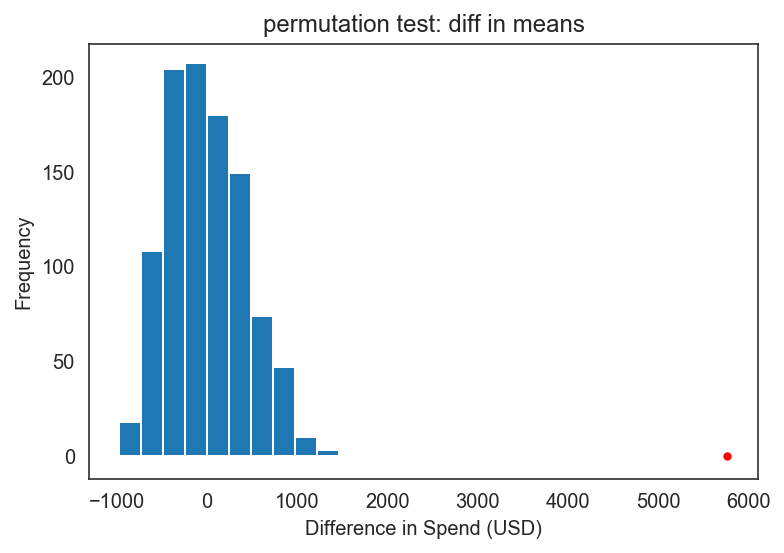

In [42]:
# find the cutoff for top 25%
top25 = np.percentile(df['Impressions'], 75)
top25

# create a new column
df['top25'] = df['Impressions'] >= top25


# setup and run the permutation test
trials, obs = permutation_test(df, 'Spend (USD)', 'top25', diff_in_means, 1000)

# display results and p-value
pd.Series(trials).plot(kind='hist', title='permutation test: diff in means')
plt.scatter(obs, 0, color='r', s=10)
plt.xlabel('Difference in Spend (USD)')
pval = trials[trials >= obs].size / trials.size
print('p-value: ', pval)

obs, trials.mean()


# Snapchat Political Ads Part 2

# Summary of Findings 


### Introduction


The prediction problem I am attempting to investigate is, given information about Snapchat political ads, I want to predict the number of impressions/views an ad generates. Thus, this is a regression problem. Using Linear Regression, I will use both generic features from our data set as well as employ feauture engineering to build pipelines and create both a baseline model and final model in order to predict our target variable: ad impressions. To measure the performance of our models I will use Root-Mean-Squared-Error (RMSE) and R$^2$ (Coefficient of Determination).

- **Prediction Problem:**  Regression Model
- **Target Variable:**  Number of impressions an ad generates
- **Evaluation Metric:**  R$^2$ and RMSE


### Baseline Model

2. A summary of the baseline model:
    - The number of features, including how many are quantitative, ordinal, and nominal.
    - The model performance (your evaluation metric) and whether you think this it's good or not (and why).
    
Continuing our open-ended investigation into the Snapchat Political Ads datasets, I used our dataset that was previously cleaned. This cleaning included reading in the datasets and merging the 2018 and 2019 datasets into one. I also normalized the 'Spend' column using a helper function, so that all amounts are in the same currency. For simplicity I converted the currencies to USD. I also created a couple of new columns using two helper functions. One for retrieving the country from the Billing Address, and one for retrieving the targeted ad language.

Just before selecting the features from the model I also decided to drop columns that had more than 95% missingness because 1, there was no point in imputing that many values, and 2, they were also columns that I deemed not as important to our prediction problem. I also dropped 'ADID','CreativeUrl',and 'CreativeProperties' whose observations were only unique to its own ad and otherwise didn't really tell us much.

In thinking of how to create a good baseline model, I thought it'd be best to use as many numerical columns as possible. Since there is only two true numerical columns in our dataset, 'Spend' and 'Impressions', I knew I had to create more numerical data in order for our regressor to work best. Our target variable being 'Impressions' left us with one numerical column, and a lot of categorical data. Even though I barely had any numerical data I wanted to see if instead using all of the categorical data would somehow make up for this and serve as good features with some statistical significance. To take care of all the other categorical columns with missing values, I used the SimpleImputer class to impute the respective null values with 'ALL', meaning no targeting criteria was used. After doing some minor cleaning I then One Hot encoded all categorical columns. As a side note, I treated 'AgeBracket' as nominal instead of ordinal because even though you can make the case for it being ordinal, many of the values were very generalized and had overlapping age ranges, or were oddly specific. There was no true way of determining some very clear cut order. 

Finally, using Linear Regression as our regressor I used our target variable and predictor variables to train our model on and fit to the data. Using a 75/25 train-test split and after fitting the model to our data to I used the model to get predictions and compute the RMSE. I received a RMSE value of 1122552.9318143446, which truthfully is not very good at all but serves as a starting point as our baseline. Knowing that the outcome of the model is somewhat dependent on the test-train split I also decided to do 50 train-test splits, and computed the RMSE and R$^2$ of each iteration and stored them in an array. I then took the mean of each to compute the RMSE and R$^2$ of both the training and test data. These are our results below
    - Baseline train R^2:  0.9364155566765785
    - Baseline test R^2:  -0.3360243573658155
    - Baseline train RMSE:  1122552.9318143446
    - Baseline test RMSE:  3808307.6654352923
    
 As you can see I ended up with a negative R$^2$ value for our baseline testing R$^2$ which suggests our model is essentially very bad. 

- **Number of Features:** 
    - Nominal: 'Currency Code', 'StartDate', 'EndDate', 'OrganizationName',
       'BillingAddress', 'CandidateBallotInformation', 'PayingAdvertiserName',
       'Gender', 'AgeBracket', 'CountryCode', 'Regions (Included)',
       'Radius Targeting (Included)', 'Postal Codes (Included)', 'Interests',
       'Segments', 'Language', 'BA Country', 'AdLanguage'
- **Model Performance:** The test set's R$^2$ is very inconsistent with the  training set's R$^2$. Both the R$^2$ and RMSE prove the baseline model to be very inaccurate/bad models. One good thing is that both the RMSEs, though very high suggest that I am not overfitting or underfitting the model, I just need to tune parameters and features better or create more meaningful ones.


### Final Model

##### Features

I modified the baseline feature which imputed and OneHotEncoded every categorical column, and only applied this feature to 2 columns (Gender and CountryCode). I did this because many of the catergorical columns included hundreds of unique values, many of which only corresponded to 1 ad. This combined with the large number of categorical columns led to overfitting, which is why the baseline model performed so well for the training set and so poorly for the test set. Gender only included 2 unique values and CountryCode included 29. 29 unique values is still somewhat large, but I felt that the targeted country has an important impact on impressions.

I also added a StandardScaler which I applied to the custom Spend (USD) column. I figured the amount spent on an advertisement is likely important in determining how many impressions the ad receives. I used this custom column because it adjusts for the variation in values of different currencies. I used StandardScaler because this column has such a large range. (The mean is about $1,655 and the max is over $450,000)

Next I accounted for how long an ad was displayed. This feature was helpful because if an ad runs for longer more people are able to see it. I calculated this by subtracting StartDate from EndDate and using FunctionTransformer and a helper method to retrieve the number of days for which an ad was displayed.

Finally, I created a feature using FunctionTransformer and a helper method that calculated how many other ads an organization was connected to in the dataset. This feature was helpful because organizations that are more popular and produce more ads likely have more experience and resources, leading to them receiving more impressions on their ads. I also used FunctionTransformer to log scale the values, since many organizations only produced 1 ad while others produced hundreds.

##### Model Selection

I used the LinearRegression model. I tested the 3 models I studied throughout the course (LinearRegression, DecisionTreeRegressor, KNeighborsRegressor) by fitting and predicting with them on 50 different train-test-splits to account for variation in the sampling. I recorded the R^2 and RMSE values each time and calculated the means. LinearRegression scores the highest R^2 value and lowest RMSE value, making it the best choice of the three. 

LinearRegression only has 2 parameters relevant to the model's prediction performance (fit_intercept and normalize). Since the data did not need to be centered or normalized neither of these parameters would have been helpful, so I used the default parameters for the model.

### Fairness Evaluation

Since I used a regression model, the only reasonable parity measures were R^2 and RMSE. I selected to test parity using R^2 because it showed much less variation and is not as dependent on the specific data used. For example, if the data for one subset included an extreme outlier, R^2 would not be affected as much as RMSE. 

I tested the fairness of my model on ads delived in the United States vs. ads delivered outside the United States. I compared the performance of the model on the subsets using a permutation test. (described below)

Test: Permutation Test
Statistic: Absolute difference in R^2
Null Hypothesis: The model is about equally accurate when run on ads delivered in the United States compared to ads delivered outside the United States. (statistic is close to 0)
Alternate Hypothesis: The model is more accurate when run on one of the 2 subsets. (statistic is not close to 0)
Level of significance: p-value < .05

    - Result: p-value = .246
    - Observed test-statistic: ~0.560
    - Average of 1,000 trials: ~0.539
    

Due to the large p-value I fail to reject the null hypothesis.
Differences in R^2 values between these subsets is likely due to variation in sampling during train-test-split. Additionally, there will be variation among the number of impressions due to the country in which the ad is delivered. 

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [44]:
# read in both data sets from 2018 and 2019
pa18 = pd.read_csv("PoliticalAds2018.csv")
pa19 = pd.read_csv("PoliticalAds2019.csv")
pd.set_option('display.max_columns', None)

# concat both data frames
df = pd.concat([pa18,pa19]).reset_index(drop =True)

#will use as feature later
# # # convert start and end date columns to universal datetime
# df['StartDate'] = pd.to_datetime(df['StartDate'], utc = True)
# df['EndDate'] = pd.to_datetime(df['EndDate'], utc = True)


# normalize 'Spend' column to have same currency, in USD
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*1.08 if row['Currency Code'] =='EUR' else row['Spend']*1, axis=1)
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*0.71 if row['Currency Code'] =='CAD' else row['Spend']*1, axis=1)
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*1.22 if row['Currency Code'] =='GBP' else row['Spend']*1, axis=1)
df['Spend (USD)'] = df.apply(lambda row: row['Spend']*0.64 if row['Currency Code'] =='AUD' else row['Spend']*1, axis=1)

#will use as a feature later
# create a column of the total duration for ad 
# df['Ad Duration'] = df['EndDate'] - df['StartDate']


#helper function to convert language code to a language
def lang_conv(language):
    if language == 'da':
        return 'Danish'
    if language == 'en':
        return 'English'
    if language == 'nl':
        return 'Dutch'
    if language == 'de':
        return 'German'
    if language == 'es':
        return 'Spanish'
    if language == 'es,en':
        return 'English and Spanish'
    if language == 'fr':
        return 'French'
    if language == 'sv':
        return 'Swedish'
    if language == 'en,de':
        return 'English and German'
    if language == 'en,es':
        return 'English and Spanish'
    if language == 'ar':
        return 'Arabic'
    if language == 'nb':
        return 'Norwegian'
    if language == 'nl,en':
        return 'Dutch and English'
    if language == 'ar,en':
        return 'English and Arabic'
    if language == 'de,en':
        return 'English and German'
    if language == 'fi':
        return 'Finnish'
    if language == 'it':
        return 'Italian'
    if language == 'nb,en':
        return 'English and Norwegian'
    else:
        return 'No Language Targeted'
    
#helper func to get country of billing address
def country_conv(string):
    if string[-2:] == 'US':
        return 'US'
    if string[-2:] == 'CA':
        if len(string) == 2:
            return 'CANADA'
        elif (len(string.split(",")[-2])  == 6) | (len(string.split(",")[-2])  == 7):
            return 'CANADA'
        else:
            return 'US'
    if string[-2:] == 'DK':
        return 'DENMARK'
    if string[-2:] == 'GB':
        return 'UK'
    if string[-2:] == 'CH':
        return 'SWITZERLAND'
    if string[-2:] == 'AU':
        return 'AUSTRALIA'
    if string[-2:] == 'FR':
        return 'FRANCE'
    if string[-2:] == 'NL':
        return 'NETHERLANDS'
    if string[-2:] == 'IE':
        return 'IRELAND'
    if string[-2:] == 'SE':
        return 'SWEDEN'
    if string[-2:] == 'NO':
        return 'NORWAY'
    if string[-2:] == 'BE':
        return 'BELGIUM'
    if string[-2:] == 'AE':
        return 'UAE'
    if string[-2:] == 'ZA':
        return 'SOUTH AFRICA'
    if string[-2:] == 'FI':
        return 'FINLAND'
    if string[-2:] == 'IN':
        return 'INDIA'
    if string[-2:] == 'AR':
        return 'ARGENTINA'
    if string[-2:] == 'AT':
        return 'AUSTRIA'
    if string[-2:] == 'KW':
        return 'KUWAIT'
    if string[-2:] == 'LT':
        return 'LITHUANIA'
    if string[-2:] == 'TR':
        return 'TURKEY'
    if string[-2:] == 'DE':
        return 'GERMANY'
    
df['BA Country'] = df['BillingAddress'].apply(country_conv)


# apply helper func, (will be useful for graphing purposes)
# null values mean no specific language was targeted
df['AdLanguage'] = df['Language'].apply(lang_conv)

In [45]:
#now that we have our dataset from project03, let's do some cleaning for potential features

#let's drop columns with over 95% missigness as there is no point in imputing that many values
#'ADID' is specific and unique to each ad but otherwise doesn't really tell us much or help us in terms of investigating
#our research question so we will drop it too, neither does 'CreativeUrl' and 'CreativeProperties'


cols = ['Regions (Excluded)', 'Electoral Districts (Included)', 'Electoral Districts (Excluded)',
        'Radius Targeting (Excluded)', 'Metros (Included)', 'Metros (Excluded)', 'Postal Codes (Excluded)',
        'Location Categories (Included)', 'Location Categories (Excluded)', 'OsType', 'AdvancedDemographics',
        'Targeting Connection Type', 'Targeting Carrier (ISP)', 'ADID', 'CreativeUrl', 'CreativeProperties']


df = df.drop(cols, axis =1)

### Baseline Model

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#now let's select some baseline model features

#get all categorical columns
cat_columns = df.select_dtypes(include = 'object').columns

#create a pipeline that will impute null values of all categorical columns and onehot encode them
# 'ALL' simply means that the field was not specifically targeted
cats_pl = Pipeline([
    ("impute", SimpleImputer(strategy="constant", fill_value="ALL")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

transformer = ColumnTransformer([
    ("categorical", cats_pl, cat_columns)
], remainder='passthrough')

In [48]:
#construct pipeline
pl = Pipeline([
    ('coltransformer', transformer),
    ('regressor', LinearRegression())
])

#create predictor variables and outcome variable
X = df.drop('Impressions', axis =1)
y = df.Impressions

#Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Fit the data
pl.fit(X_train, y_train)
#Getting the accuracy score

preds = pl.predict(X)
print('rmse:', np.sqrt(np.mean((preds - y)**2)))

rmse: 1966577.3743550943


In [49]:
#now because we know that the test/train split is random and thus can change the performance of the model
#we will do many splits and get a mean R^2 and RMSE

r2_train = []
r2_test = []
rmse_train = []
rmse_test = []
#let's do 50 train test splits and get the mean R^2 and RMSE values
for _ in range(50):
    #test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # fit training data
    pl.fit(X_train, y_train)
    # get the predictions of the train and test sets
    preds_train= pl.predict(X_train)
    preds_test= pl.predict(X_test)
    # compute RMSE and R^2
    rmse_test.append(np.sqrt(np.mean((preds_test - y_test) ** 2)))
    rmse_train.append(np.sqrt(np.mean((preds_train - y_train) ** 2)))
    r2_test.append(pl.score(X_test, y_test))
    r2_train.append(pl.score(X_train, y_train))

mean_r2_test = np.mean(np.array(r2_test))
mean_r2_train = np.mean(np.array(r2_train))
print ("Baseline train R^2: ", mean_r2_train)
print ("Baseline test R^2: ", mean_r2_test)
mean_rmse_test = np.mean(np.array(rmse_test))
mean_rmse_train = np.mean(np.array(rmse_train))
print ("Baseline train RMSE: ", mean_rmse_train)
print ("Baseline test RMSE: ", mean_rmse_test)

Baseline train R^2:  0.9364155566765785
Baseline test R^2:  -0.3360243573658155
Baseline train RMSE:  1122552.9318143446
Baseline test RMSE:  3808307.6654352923


In [50]:
#let's also use the cross validation strategy
#it will utilize the entire data set as well as smooth out any noise or randomness due to a #particular split 
scores = cross_val_score(pl, X_train, y_train, cv=5)
scores
#training error typically under estimates testing error
#and we notice that the baseline test R^2 value is negative, as well as
#some of the cross validation scores suggesting that regression line might be worse than using #the mean value

array([-0.20536145, -1.06425707, -0.15089058, -1.0192476 ,  0.73898577])

### Final Model

forest_selection_importance
Interests_ALL                                       0.018909
AgeBracket_18+                                      0.015149
Segments_Provided by Advertiser                     0.014330
Segments_ALL                                        0.013100
Regions (Included)_ALL                              0.010937
Gender_FEMALE                                       0.010288
AgeBracket_18-24                                    0.009304
Language_ALL                                        0.008997
AdLanguage_No Language Targeted                     0.008917
AgeBracket_ALL                                      0.008345

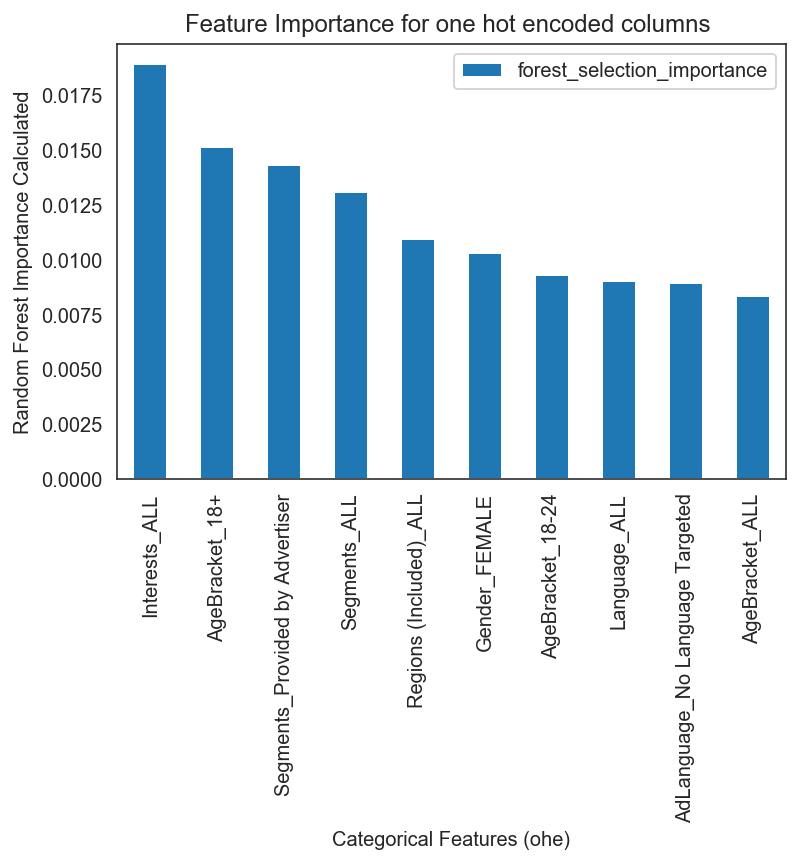

In [51]:
filt_cat = df.drop(["StartDate", "EndDate", "Impressions","Spend (USD)", "Spend"], axis=1)
impute_cat = filt_cat.fillna("ALL")
X_cat = pd.get_dummies(impute_cat)
# the predicted value from features will be Impressions.
y = df["Impressions"]

forest_selection = RandomForestClassifier(n_estimators=10, class_weight='balanced', n_jobs=-1)
# fit the X (all categorical values) and y ("Impressions") to random forest classifier.
forest_selection.fit(X_cat, y)


top_features = pd.DataFrame(list(zip(forest_selection.feature_importances_)),
                           index=X_cat.columns,
                           columns=['forest_selection_importance']).sort_values(['forest_selection_importance'],ascending=False)

# plot the first 10 most important features, according to RandomForestClassifier.
top_10 = top_features.head(10)
top_10.plot(kind='bar')
plt.title("Feature Importance for one hot encoded columns ")
plt.xlabel("Categorical Features (ohe)")
plt.ylabel("Random Forest Importance Calculated")
top_10

In [52]:
def preprocess(df):
    # Create a copy to be safe
    df_copy = df.copy()
    
    #convert Start and End Dates to datetime
    df_copy['StartDate'] = pd.to_datetime(df_copy['StartDate'])
    #Ads whose EndDate are null are ongoing, so let's just impute the date we downloaded the data
    dl_date = "2019/05/13 09:25:00Z"
    df_copy['EndDate'] = pd.to_datetime(df_copy['EndDate']).fillna(pd.to_datetime(dl_date))
    #store EndDate
    
    
    # Modify Segments column so that 'Provided by Advertiser' == 1, na == 0
    df_copy["Segments"] = (
        df_copy["Segments"]
        .fillna(0)
        .replace('Provided by Advertiser', 1)
    )
    df_copy = df_copy.fillna('ALL')
    df_copy['Segments'] = df_copy['Segments'].astype(float)
    
    return df_copy


data = preprocess(df)
data.head()

Currency Code  Spend  Impressions           StartDate             EndDate  \
0           USD    897       252799 2018-11-04 00:57:48 2018-11-07 03:00:05   
1           USD     49         7527 2018-10-31 17:58:01 2018-11-06 22:59:59   
2           EUR    219       108884 2018-09-30 10:24:48 2018-10-14 10:24:55   
3           USD     66        22167 2018-11-02 13:00:00 2018-11-03 03:59:59   
4           USD    815        72711 2018-10-18 16:25:09 2018-11-06 23:00:00   

                               OrganizationName  \
0                  Save Our Schools Arizona PAC   
1                         Mothership Strategies   
2                                   Media Agent   
3  Chuck Clemons for Florida House District 21    
4                      Bully Pulpit Interactive   

                                      BillingAddress  \
0                                                 US   
1  1328 Florida Avenue NW, Building C, Washington...   
2                     Østre alle 2 ,Værløse ,3500,DK   
3                                                 US   
4           1445 New York Ave NW,Washington,20005,US   

  CandidateBallotInformation          PayingAdvertiserName Gender AgeBracket  \
0                        ALL  Save Our Schools Arizona PAC    ALL        18+   
1                        ALL   Progressive Turnout Project    ALL        18+   
2                        ALL              Dansk_Folkeparti    ALL        ALL   
3                        ALL    Chuck Clemons for FL House    ALL        17+   
4                        ALL               NextGen America    ALL      18-34   

     CountryCode Regions (Included)  \
0  united states            Arizona   
1  united states                ALL   
2        denmark                ALL   
3  united states                ALL   
4  united states                ALL   

                         Radius Targeting (Included)  \
0                                                ALL   
1                                                ALL   
2                                                ALL   
3  latitude 29.65199994518531;longitude -82.33818...   
4                                                ALL   

                             Postal Codes (Included) Interests  Segments  \
0                                                ALL       ALL       1.0   
1                                                ALL       ALL       0.0   
2                                                ALL       ALL       1.0   
3                                                ALL       ALL       1.0   
4  953,239,536,095,336,000,000,000,000,000,000,00...       ALL       0.0   

  Language  Spend (USD) BA Country            AdLanguage  
0      ALL        897.0         US  No Language Targeted  
1      ALL         49.0         US  No Language Targeted  
2       da        219.0    DENMARK                Danish  
3      ALL         66.0         US  No Language Targeted  
4      ALL        815.0         US  No Language Targeted

In [53]:
df_copy = data.copy()

In [54]:
df_copy["Duration"] = (df_copy['EndDate'] - df_copy["StartDate"]).apply(lambda x: x.days)
df_copy['Duration'] = df_copy['Duration'].astype(float)

# df_copy['Duration'] = pd.to_datetime(df_copy['EndDate']) - pd.to_datetime(df_copy['StartDate'])
# df_copy['Duration days'] = df_copy['Duration'].dt.days
# df_copy['Duration hours'] = df_copy['Duration'].dt.components['hours']
df_copy['Amount spent per Impression (USD)'] = df_copy['Spend (USD)'] /df_copy['Impressions']

In [55]:
X = df_copy[['Spend (USD)', 'BA Country', 'AdLanguage',\
             'Duration', 'Amount spent per Impression (USD)',\
            'Interests', 'Segments', 'AgeBracket']]
y = df_copy['Impressions']


types = X.dtypes
catcols = types.loc[types == np.object].index
numcols = types.loc[types != np.object].index

In [56]:
cats = Pipeline([("impute", SimpleImputer(strategy="constant", fill_value="ALL")),\
                  ("ohe", OneHotEncoder(handle_unknown="ignore", sparse = False))
                  #('pca', PCA(svd_solver='full', n_components=0.99)),
                ])

scaler = Pipeline([('scale', StandardScaler())])
# days = Pipeline([('days', FunctionTransformer(get_days))])
# common = Pipeline([('common', FunctionTransformer(how_common)),\
#                    ('log', FunctionTransformer(np.log))])                 
                             
preproc = ColumnTransformer([('impute', cats, catcols),\
                             ('scale', scaler, numcols)],
                             #('days', days, ['Duration']),\
                            # ('common', common, ['OrganizationName'])],\
                           #remainder='drop')
                           )

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# test various models to see which scores the best using default parameters
models = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(),RandomForestRegressor()]
names = ['Linear Reg', 'Decision Tree', 'K Neighbors', 'Random Forest']

#create predictor variables and outcome variable
# X = df_copy.drop('Impressions', axis=1)
# y = df_copy.Impressions

X = df_copy[['Spend (USD)', 'BA Country', 'AdLanguage',\
             'Duration', 'Amount spent per Impression (USD)',\
            'Interests', 'Segments', 'AgeBracket']]
y = df_copy['Impressions']

# run 50 trials for each model and record results
results = pd.DataFrame(index=names, columns=['R^2', 'RMSE'])
for m in range(len(models)):
    r2_test = []
    rmse_test = []
    
    pl = Pipeline([('preprocessor', preproc),\
                   ('regressor', models[m])])
    
    for _ in range(50):
        #test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        # fit training data
        pl.fit(X_train, y_train)
        # get the predictions of the train and test sets
        preds_test = pl.predict(X_test)
        # compute RMSE and R^2
        rmse_test.append(np.sqrt(np.mean((preds_test - y_test) ** 2)))
        r2_test.append(pl.score(X_test, y_test))
    
    mean_r2 = np.mean(np.array(r2_test))
    mean_rmse = np.mean(np.array(rmse_test))
    results.iloc[m, :] = [mean_r2, mean_rmse]
    
results

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2         RMSE
Linear Reg    -2.45009e+23  9.02842e+17
Decision Tree     0.640837  2.76178e+06
K Neighbors       0.469842  3.03239e+06
Random Forest     0.675234   2.6329e+06

#### It appears that the RandomForestRegressor returns the best model results, so let's see if we can tune some parameters using GridSearchCV

In [58]:
cats = Pipeline([("impute", SimpleImputer(strategy="constant", fill_value="ALL")),\
                  ("ohe", OneHotEncoder(handle_unknown="ignore", sparse = False))
                  #('pca', PCA(svd_solver='full', n_components=0.99)),
                ])

scaler = Pipeline([('scale', StandardScaler())])
# days = Pipeline([('days', FunctionTransformer(get_days))])
# common = Pipeline([('common', FunctionTransformer(how_common)),\
#                    ('log', FunctionTransformer(np.log))])                 
                             
preproc = ColumnTransformer([('impute', cats, catcols),\
                             ('scale', scaler, numcols)],
                             #('days', days, ['Duration']),\
                            # ('common', common, ['OrganizationName'])],\
                           #remainder='drop')
                           )
pl = Pipeline([('feats', preproc), ('reg', RandomForestRegressor(n_estimators=10))])


In [59]:
rmse_test = []
for _ in range(50):
        #test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        # fit training data
    pl.fit(X_train, y_train)
        # get the predictions of the train and test sets
    preds_test = pl.predict(X_test)
        # compute RMSE and R^2
    rmse_test.append(np.sqrt(np.mean((preds_test - y_test) ** 2)))
    r2_test.append(pl.score(X_test, y_test))

np.mean(rmse_test)

2723942.8675265843

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'reg__n_estimators': n_estimators,\
               'reg__max_features': max_features,\
               'reg__max_depth': max_depth,\
               'reg__min_samples_split': min_samples_split,\
               'reg__min_samples_leaf': min_samples_leaf,\
               'reg__bootstrap': bootstrap}


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(pl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


{'reg__n_estimators': 18,
 'reg__min_samples_split': 5,
 'reg__min_samples_leaf': 1,
 'reg__max_features': 'auto',
 'reg__max_depth': 80,
 'reg__bootstrap': True}

In [61]:
#best params are now narrowed down for each hyperparamater
fit = pl.fit(X_train, y_train)
best_params = {'reg__n_estimators': [5,10,15,20],
 'reg__min_samples_split': [4,8,10],
 'reg__min_samples_leaf': [2,4,6],
 'reg__max_depth': [80,90,100]}
clf = GridSearchCV(fit, best_params, cv=5, verbose=1, refit=True, n_jobs = -1)


In [62]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.9min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('feats', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('impute', Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value='ALL', missing_values=nan,
       strategy='constant', verbose...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'reg__n_estimators': [5, 10, 15, 20], 'reg__min_samples_split': [4, 8, 10], 'reg__min_samples_leaf': [2, 4, 6], 'reg__max_depth': [80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [63]:
clf.best_params_

{'reg__max_depth': 80,
 'reg__min_samples_leaf': 4,
 'reg__min_samples_split': 8,
 'reg__n_estimators': 10}

In [64]:
cats = Pipeline([("impute", SimpleImputer(strategy="constant", fill_value="ALL")),\
                  ("ohe", OneHotEncoder(handle_unknown="ignore", sparse = False))
                  #('pca', PCA(svd_solver='full', n_components=0.99)),
                ])

scaler = Pipeline([('scale', StandardScaler())])
# days = Pipeline([('days', FunctionTransformer(get_days))])
# common = Pipeline([('common', FunctionTransformer(how_common)),\
#                    ('log', FunctionTransformer(np.log))])                 
                             
preproc = ColumnTransformer([('impute', cats, catcols),\
                             ('scale', scaler, numcols)],
                             #('days', days, ['Duration']),\
                            # ('common', common, ['OrganizationName'])],\
                           #remainder='drop')
                           )
pl = Pipeline([('feats', preproc), ('reg', RandomForestRegressor(max_depth= 100, n_estimators= 15,min_samples_leaf= 4,min_samples_split=8 ))])

In [65]:
r2_test = []
rmse_test = []
        
    
for _ in range(50):
    #test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        # fit training data
    pl.fit(X_train, y_train)
            # get the predictions of the train and test sets
    preds_test = pl.predict(X_test)
        # compute RMSE and R^2
    rmse_test.append(np.sqrt(np.mean((preds_test - y_test) ** 2)))
    r2_test.append(pl.score(X_test, y_test))
print('rmse_test:',np.mean(rmse_test))
print('r2_test:',np.mean(r2_test))

rmse_test: 2312500.9235482137
r2_test: 0.7001489149703771


### Fairness Evaluation


In [66]:
# I will be comparing the subsets of ads delivered in the US vs. outside the US
# I will be comparing the absolute difference in R^2 values

pl = Pipeline([('preprocessor', preproc),\
                ('regressor', RandomForestRegressor(max_depth= 100, n_estimators= 15,min_samples_leaf= 4,min_samples_split=8 ))])

# perform test
n_reps = 500
r2_US = []
r2_nonUS = []
shuffled = df_copy.copy()
for _ in range(n_reps):
    # shuffle CountryCode
    shuffled['CountryCode'] = shuffled['CountryCode'].sample(replace=False, frac=1)\
                                                    .reset_index(drop=True)
    
    # split dataset
    US = shuffled[shuffled['CountryCode'] == 'united states']
    nonUS = shuffled[shuffled['CountryCode'] != 'united states']
    
    # calc R^2 for US ads
#     X = US.drop('Impressions', axis=1)
#     y = US.Impressions
    X = US[['Spend (USD)', 'BA Country', 'AdLanguage',\
             'Duration', 'Amount spent per Impression (USD)',\
            'Interests', 'Segments', 'AgeBracket']]
    y = US['Impressions']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    pl.fit(X_train, y_train)
    preds_test = pl.predict(X_test)
    
    r2_US.append(pl.score(X_test, y_test))
    
    # calc R^2 for non-US ads
#     X = nonUS.drop('Impressions', axis=1)
#     y = nonUS.Impressions
    X = nonUS[['Spend (USD)', 'BA Country', 'AdLanguage',\
             'Duration', 'Amount spent per Impression (USD)',\
            'Interests', 'Segments', 'AgeBracket']]
    y = nonUS['Impressions']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    pl.fit(X_train, y_train)
    preds_test = pl.predict(X_test)
    
    r2_nonUS.append(pl.score(X_test, y_test))
    
diffs = np.array(r2_US) - np.array(r2_nonUS)

In [67]:
# calc observed test statistic
# split dataset
US = shuffled[shuffled['CountryCode'] == 'united states']
nonUS = shuffled[shuffled['CountryCode'] != 'united states']

# calc R^2 for US ads
# X = US.drop('Impressions', axis=1)
# y = US.Impressions
X = US[['Spend (USD)', 'BA Country', 'AdLanguage',\
             'Duration', 'Amount spent per Impression (USD)',\
            'Interests', 'Segments', 'AgeBracket']]
y = US['Impressions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
pl.fit(X_train, y_train)
preds_test = pl.predict(X_test)

r2_US_obs = pl.score(X_test, y_test)
    
# calc R^2 for non-US ads
# X = nonUS.drop('Impressions', axis=1)
# y = nonUS.Impressions
X = nonUS[['Spend (USD)', 'BA Country', 'AdLanguage',\
             'Duration', 'Amount spent per Impression (USD)',\
            'Interests', 'Segments', 'AgeBracket']]
y = nonUS['Impressions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

pl.fit(X_train, y_train)
preds_test = pl.predict(X_test)

r2_nonUS_obs = pl.score(X_test, y_test)

r2_obs = np.abs(r2_US_obs - r2_nonUS_obs)

observed stat:  0.5600157418272727
mean of trials:  0.539679271281358
p-value:  0.246


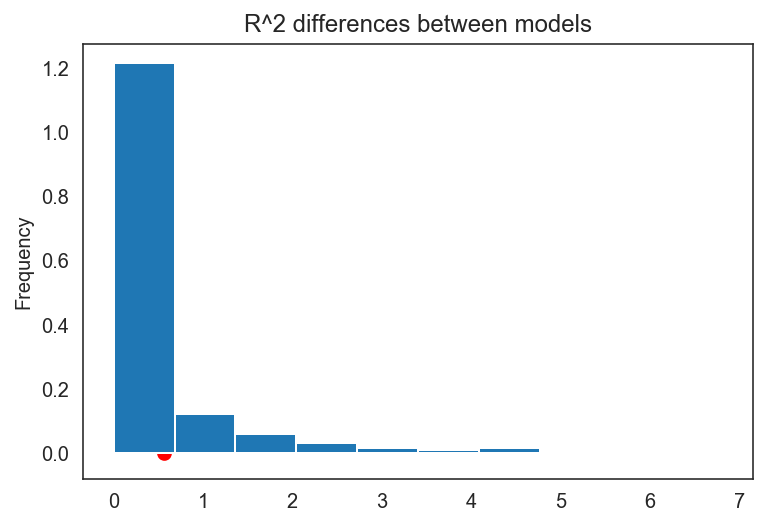

In [68]:
# plot results
diffs = pd.Series(np.abs(diffs))
title = 'R^2 differences between models'
diffs.plot(kind='hist', density=True, title=title)
plt.scatter(r2_obs, 0, color='red', s=40)
# p-value
pval = len(diffs[diffs > r2_obs]) / len(diffs)
print('observed stat: ', r2_obs)
print('mean of trials: ', np.mean(diffs))
print('p-value: ', pval)